**Module downloads**

In [ ]:
!pip install moviepy
!pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 97 kB/s 


In [ ]:
import moviepy.editor as mp

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2162688/45929032 bytes (4.7%)4644864/45929032 bytes (10.1%)6602752/45929032 bytes (14.4%)8634368/45929032 bytes (18.8%)11313152/45929032 bytes (24.6%)14082048/45929032 bytes (30.7%)16670720/45929032 bytes (36.3%)19046400/45929032 bytes (41.5%)20594688/45929032 bytes (44.8%)23019520/45929032 bytes (50.1%)25944064/45929032 bytes (56.5%)27951104/45929032 bytes (60.9%)3

In [ ]:
!pip install pydub

**Audio to Text**

In [ ]:
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
import speech_recognition as sr
# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                pass
                #print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                #print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

**Dataset Loader (Video to Audio)**

In [ ]:
start_video=int(input("Enter starting video number"))
end_video=int(input("Enter ending video number"))
for i in range(start_video-1,end_video):
  my_clip = mp.VideoFileClip("/content/tvsum50/"+str(i+1)+".mp4")
  my_clip.audio.write_audiofile(str(i)+".wav")

Enter number of input videos50
[MoviePy] Writing audio in 46.wav


100%|██████████| 5160/5160 [00:02<00:00, 2282.47it/s]

[MoviePy] Done.


[MoviePy] Writing audio in 47.wav


100%|██████████| 3180/3180 [00:01<00:00, 2305.77it/s]

[MoviePy] Done.


[MoviePy] Writing audio in 48.wav


100%|██████████| 2449/2449 [00:01<00:00, 2331.04it/s]

[MoviePy] Done.


[MoviePy] Writing audio in 49.wav


100%|██████████| 8942/8942 [00:03<00:00, 2236.73it/s]


[MoviePy] Done.
[MoviePy] Writing audio in 50.wav


100%|██████████| 6094/6094 [00:02<00:00, 2240.42it/s]

[MoviePy] Done.



Full text 46:  We're taking smartphone a spaceship technology on a motorcycle platform with the safety of a car. They see it there is a robot motorcycle. Itself oz and i really creases like you know your safety and your range. And excitement of riding a motorcycle. Jordan miles for charge to two-wheel drive. Wheel hub motor electric vehicle. Stare like a car. You said it like a car pedals like a car but. You know the robot side it takes your steering input. And eileen he returns a lot like a jet fighter. So it's you can see full like tronics in here. And this is actually a real jar all right here so take a look at this the gyroscopes inside. Basically output around 1300 ft lb of torque. So you basically the baby elephants knock it over it's a lot like a cmg or control momotaro. The international space station and most satellites use the same fry orientation technology we've just kind of taking that and you don't need a commercially available their servos and there a gyro motors there 

**Dataset Loader (Audio to Text)**

In [ ]:
data1=[0]*(end_video)
for i in range(start_video-1,end_video+1):
  path=str(i+1)+".wav"
  data1[i]=get_large_audio_transcription(path)
  print("\nFull text "+str(i+1)+": ",data1[i])

for i in range(start_video-1,end_video+1):
  if data1[i]==0:
    data1[i]=""


Full text 5:  Baby at saigon sandwich. Diversion. Henagar. 


In [3]:
data=[
"",
"Dogs and cats naturally wear down their nails while walking running or scratching trees however some animals don't and this can be a problem cutting the nails can be a difficult problem for both of you. Initially it seems that it will be impossible but with love and patience it can be done sometimes your dog or cat may be uncomfortable when you were handling parts of the body that he isn't used to having touched get him to lie down try to relax him and slowly get him used to allowing you to touch his ears legs feet and pause this will be helpful for when you need to visit the vet or groomer like humans dogs have two parts to their nails the end of the nail is dead the other part closer to the paul has small veins sometimes you can see where the vein is but this depends on the color of the nail it is important not to cut too close to the paw as this will make him bleed the first time you cut your dog's nails let him smell the scissors or nail clippers let him get used to them slowly when the dog is relaxed cut one nail at a time talking to him the whole time consult your vet or pet shop if you have any questions make sure you look for the dewclaw and cut the nail because sometimes this can cause problems and become embedded in the skin gloria nail clippers and scissors remain very sharp other clippers or scissors blunt very quickly and instead of cutting the nails they can splinter or break them if your clippers or scissors do not cut properly please change them for new one your dog will love that you spend time taking care of him do you need more information do not hesitate contact us at gloria we are here to help.",
"Buenos aires in the city for the fashion-conscious everybody wants to look good but dressing up isn't just for 14 years out on the town presentable suggest is important for their dogs where do you go for your beauty treatments at sebastian's and recoleta dogs big and small, makeover. Casa diaz. They put terminal. Newest real. Down here everyone knows who the boss is.",
"520 city the european project was to get city starts in southend-on-sea and cambridge in the uk middleburg and the province of zeeland in the netherlands and belgium.",
"Baby at saigon sandwich. Diversion. Henagar.",
"",
"Going 2/3 of calls now, the tyra packet instead of his farewell i'm all these kids aren't always popular with drivers if your car has one you'll need to know how to use it. If you get a puncture pull over and stop as soon as you find a safe place. Preferably away from traffic. Apply the handbrake and switch your engine off. And turn on your hazard lights if necessary. Now take a look at the punkture. Scenic it's will only fill holes up to about four millimeters across. Okay that's fine. Firestone. You coming tonight to call the breakdown service. You found your packet in the boat. Atlanta bay in the solar panels. Alaska under the floor. That consists of two parts. The positive seinen. And the compressor for pumping up the tires. If you do have an object like a nail in your tire don't try to remove it. Just unscrew the valve cap. And attached to say timbuktu. Amongst attach the pressure i seen them will spread around inside the toya. Honest toyota the air compressor for inflating the tires. Is that attach to the back of the bustle. However many other calls you need to unscrew the poster and attach the air compressor directly to the valve on the toilet. Now it's time to inflate your tire. So take the lead from the compressor and plug it into the cigarette lighter or 12 volt socket inside your car. Then start the engine. Now turn the compressor on an in-flight the time until it reaches the recommended pressure shown in your car's handbook. If the tire isn't inflating pro play troy rolling the car forward a few meters to help the seeding spread around if that doesn't work you may still need to cool the breakdown service. He managed to repair the tire well done you can carry on driving but you need to stuff a couple of miles down the road to check your tire pressures again and remember this is only a temporary fix so drive gently and keep your speed below 50 miles an hour when you get to remember that you need to buy new zealand and the new tire which test before you buy. Take the links to find out best boy toys readout going to saving money on tires and find out which breakdown companies we recommend.",
"There's a slogan is charging an electric car is charging the energy of the earth. This means that you get to play a role in reducing greenhouse gas emissions by driving eco-friendly vehicles. An exhibition took place to showcase a wide range of electric cars and related equipment let's take a look. This is an electric car that emits less carbon dioxide and air pollutant connected her with a charger improvised electric current through a transmission. The minister of environment seoul metropolitan government in korea and government corporation is established infrastructure for electric cars. Electric cars and infant explain quality improvement. This is a machine that access estate of lots of voltage and current british and use of electricity haikal. Is it can estimate efficiency baby it's useful when conducting research and development. The 2012 electric vehicle and smart curry salvation was held in october 17th to display eco-friendly electric vehicles and related equipment. Can you tell a funny pictures of electric vehicles related industries including two wheeled vehicle of material charging system dissipated into this is a business fair that is a deficit exchanges between perfect. This they're presented diver selectively hikers auto parts and analysis system as well as all electric battery powered cordless. Overseas markets a m were held on the sidelines of defense formation to korean electric car manufacturers. Electric vehicles has reduce greenhouse gas emissions and air pollutants to raise penetration rate of electric companies will happen liberty develop advanced technologies.",
"We didn't know already how to do it your side of change. Trailer. Atv. Lawn tractor. Motorcycle. You know in small vehicle tires just with a couple screwdrivers or something like that. They all work pretty much the same way. First of all there's three kinds of bead styles the first feed style is the tube style tire. Doesn't have very much of a bump or anything on the inside of the rim 2. Lock the rubber beaded attire. The outside of the rim it just. Flip trade-off by just stepping on the edge of the tire. Pedal separate the tire from the edge of the rim. Tubeless tire design like car tires and many other things. Heavy partially locking sealing system to be to rim. And they're more difficult to separate you may need to switch the tire in a vice. Pasadena tire machine. Workplace attire you're going to change right in front of the wheel of a vehicle. And slowly drive over the rubber part close to the rim. And that me break it for you. She was a stupid to try to beat it with a big hammer yellow usually end up wrecking your rim. Another method is. Put the rubber part of the tire. On your face of your jack and put it underneath the high vehicle or something heavy. And. Start jacking it up. And that will create a lot of pressure in a squishing edge 2. Break the bead. So what's that's done what you change the tire is. I like to set the nipple for the air phil least to that side or that side and start. There. So. You step on your tire. Can you get the beat the drop to the lowest pocket inside your rim. Then you get a parachute hours and if you have no tubing there you don't have to worry but if you have a tube you have to be very careful. Not the prick youtube. It's sometimes very important not to have that nipple. Either under business area here or where you're working with your starting. It gets in the way and sometimes causes you not to be able to get. You're be to drop deeply into the pocket. Or if you have a to b causes your. Tubes that stick up their somewhat and you shoot every will catch it and damage it. So now i've got it stepped on. And i've got my screwdriver carefully in there in case there's a tube and i've got to let pride up. But i just get some soapy water something or sprained or something like that and i leave the edges. Like so. Now by taking small bites but tired of time. I start to unpeel it was still keeping the pressure on the other side to keep the bead into the deep groove. It may be also necessary sometimes to safeway example. Pinche rim a little bit with a vice grip right there. Stop the tire from slipping around at the same time your. I'm peeling it off or peeling it back on. Well that took about one minute that's salt peeled. If you have a tube type tire. You only have to peel one side off. You can just lift your tire up and get enough space near to get your hand in there. And get up the tube. If you want to completely take the tire off the rim is. Best to just flip it over like i did now. And work from the back side. Sticky she divers here and there. And try to tire off that way. Second sight always comes off a lot easier. My tire had a tube in it that's the way i wanted to be but when you're installing youtube didn't put the old one back in tubes very often head of have a right or left side. Restaurant a motorcycle. So that means a nipple ism moroch center. If you put it in backwards made go in fine soon as you start blowing it up all of a sudden you suck itself in. We can't get ahold of nipple anymore. You got your tire all put back together. The only way to get your tire back apart is. Karachi put a hole in it. 3d route start all over again then pack your whole if you put the tubing upside down so that sucks. Put it back on. Cut the valve stem over there a vice grip opposite to it now i'm going to stand as best as i can hear sometimes it takes two people get that lip into the deep groove. I didn't get my screwdriver. And work this all the way around and slowly people dawn by small amounts at a time. And that just went on in. 32nd court sometimes it takes longer. Especially on quad tires to reseal the bead takes a lot of pressure because it's at high pressure locking be because it's a low pressure tire. So my advice is to put spray nine. Or soapy water all the way around both sides of the bead and then put your lots of air pressure in. And even park it in the sun cuz warming it up helps it slip onto. And it's done. Actually pretty easy know you paying someone 25 bucks or something when it's just basic tools and a little bit of weight. Last thing i didn't mention that i took that. Quad tire to a shop and had them user machine to break the deed. Atv tires or quad tires are very low pressure so they don't use air 2. Keep it tight fit. To lock the b to the rim. They have a bead locking design which is very difficult to break the bead. The other methods method i showed and talked about probably won't work. So if you don't have one of those kind of machines. You better go to a place have someone break the beat for you. They have this kind of high-pressure locking bead because the tires are low pressure and if you're doing hard cornering. You don't want the tired all of a sudden flip off the rim and then roll your machine.", 
"I like really hit the gym really thorough that night. About about 7 years ago and since then we've other people will start to join us with your grass so i was with larenz made out of people. Parkour is a discipline of training your mind and body to overcome obstacles and i'll be trained s5 running jumping climbing vaulting balancing things like that you want to try a new job for you not just you know just physically job at the same time. We teach now you teach classes are we to seminars hoping to share what we know with other people. Really it was kind of been staying around like this. I need honestly just kind of get her ankles warming up a little bit. While we're doing this. Let's go warm up our wrist some so just kind of roll your wrists like this. Space. Rolls or something that can save your life or your knee i tore two muscles in my neeks i fell off a building and i didn't roll my leg buckled to the side but had i actually rolled i would've been okay. Poor decisions so. And if you ever seen people do the dive rolls that's going to be teaching you too so we'll start with rolls on the ground fall rolls and then dive world. Push off and really drive your shoulder everything into the ground. Okay to do this. Is it you swim with your foot through that'll provide you that'll provide your body with emotion up you need and your hands are just there to support you when you come back down. So it's a little bit weird but basically watch i'm using my right foot on the jump that'll pick me up my hands are only there to support me on the way back down. So coming through. I'll just go here. How many people. My compaq. Ninja challenge. Not the best. Okay who's benjamin smith. Whom.",
"I totally jacked up his bum. I think i feel a little bit better or i'm just on so many. Jugs. It doesn't hurt. Bentley a bath and a trim cuz i don't like the way that he came out. Going to the groomer. Last week i feel like she doesn't deserve him. And i liked it so imma do this. Myself. Give him a bath bomb out i ordered the wahl bravura clipper set and not should be delivered any minute now by fedex. But figured i would just wash. I'm plum out you know he's already kind of clean. But everything i read about using clippers and clipping dogs. The clippers just work best when they are clean not they're playing when the dogs clean so. I figure i'll just get this part out of the way to use a white shampoo because i believe they used one on him at the groomers and you stuff. Earthbath puppy shampoo blueberry facial for space. And then after that you bake. Cuz i. Enjoy the result that i get with that myself and i'm just wearing that cuz it makes me feel like. You know legit like. People that wear aprons they know what they're doing. I'm not philip to see fill it up fill it up. He is like a little. Bro. He's all clean and dry i'm actually quite pleased with my work. Mohanty. And i. Think i kind of desensitized him to the hair dryer. In his face. Cuz i just rapid fired kimball at him. When i was using the blow dryer in the parts that he didn't like cuz i read in a job training book. How to desensitize a man i think it worked a little bit i was able to actually blow out his head and it's not all wavy. I mean i could have blown out better but you know what i think i actually did a pretty good job even though your face is a little dirty. So now i'm just going to let him play. And we're waiting for our clippers to be delivered you not going to go to the groomer while your mama's going to do it. Can my mama's on keep me looking for liar we're like in the catacombs of atlantic station and we're going to get so lost and we already. When is the fix. That. They came. I totally jacked up his bum. I'm just going to leave it i'm not going to try to fix it cuz then it'll just look stupid. But that's okay cuz then it's easier to clean when there's less hair back there do you like your haircut. So i just need to go back in here. I'm just a little bit. And he'll be done not perfect can you do something the first time it's never perfect. Look at all that hair. He's getting really wiggly and. I'm not feeling good i think it's time for me to take some more drugs. They're going to take a little break. And we will resume. It's really not that bad probably need a little more. Tear. Say i look good mama you did good job. Oh my god i like totally jacked up his butthole. And i'm just going to i don't even know what i did i just kind of went along with maltese obsession. With what she didn't her video has a couple spots that aren't perfect. But it's my first time it's okay and also he just got blown out so when his hair grows back. And his natural oils come back it'll blend a lot better. You my little puppy for everything a do you want to do i want his legs a little smaller. And i kind of don't make fun of me like his but i did way too much. Show me your butt. I did too much on your but i'm still having my bubbies. Fre. I'm going to call it a night i need to get my life back i have the everywhere. I love this. I'm never taking him to the groomer. unless i just need his lines touched up what i did i kind of followed. Like the shaping hat and just kind of. Put doubt she didn't cut him short enough last time i like him like that and i want his head to grow out and i don't know i have a plans i'm just too tired to talk about it. Bai bubbles. Stay. Goodnight. To all your friends she was crazy i got a bath a blow-dry and a haircut and the top. Sprout does it tonight but. I don't have a full not yet cuz i'm still a baby puppy can give him a kiss as my balls. Are you such a sweet bobby.",
"",
"A hydrocodone. Broccoli. Ncg. Is a fascist. Am i. Gorgeous. You don't have to pay in d.c. peanuts. Augustine casino. Uncut mobile. Come on. Shuffle music. Mistletoe a please don't tell me. Call melissa. Una cancion. Music opera. La liga. Plow on at the cinema. Aaa. Mclaren. Avatar. Wcco television. Ashley bell. Because i do. Difficult. Apologize. 2429. If so, don't even with you. L'appel du vide downfall squally mobile. Gwtw steal a security officer during a table. Indonesian police hawaii. The chances all i want somebody on. Ivw in boulder. Ulta. Today's weather. Young. Richmond weather. Is it. Lavallette municipal parking. Recent police almost at gmail.com.",
"Hangout.com. Call sandra. Optimus. Dr. jacarilla according to the admiralty personality moves and all the stuff. I needed that this one sees the lady she's a lady. What's this all about. You can talk about them with different people with known people awesome awesome collection of people from different backgrounds from different shades.",
"As extension educators we get frequent phone calls concerning paper wasps and their nests. And as a homegardner you'll probably run into these things at one point in time now. This is a little bit of a problem because paper wasps are actually a beneficial insects are out collecting. Caterpillars off of your crops. But the problem is when you get too close to them their indiscriminate stingers. New spring cleaning and getting ready for gardening it's a good opportunity to take those and just remove them from where they're at. And. Usually they're found in the eaves of homes and structures. And they can be knocked down with a shovel or other implements. And then taken away and thrown away. So if the wasps that build a nest in a location that's. I could potentially be a threat to yourself or your family or your pets. It's a good idea to go ahead and remove it whenever you possibly can. And that can be done chemically. Their products available that are specific to wasp and hornet control. And wait until evening. Spray that product so that all the wasps are on the nest. And then once they've all died you can clean that wasp nest off just like you would this one that's in the eaves at we have already removed. This is jeff edwards university of wyoming extension from the ground up.",
"What's the number one question people ask about six gear bikes. How do you stop. How to stop on a fixed gear bike is the most frequently asked question from mom's pedestrians or other people who can't believe you're riding a bike with no brakes. Are lots of techniques to stop a fixed gear bike. The one we recommend is by using your friend break if you're going to be a real g and you got rid of the front brake here's some tips that will help you slow your roll. First. The skip stop. This is a technique where you skip on your rear wheel gradually slowing you down. When you land the bike skips and reduces speed. Refugee together and you just save yourself from crashing and that parked car. Hey what's up cuz i'm new york and if you're wondering how to do a skip stop i got your answer. First of all you want to get up to speed. You don't want to rise out of your saddle way to take weight off the back wheel. Then using your feet you're literally going to pick up the back wheel which are basically stopping in midair. Also keep in mind whatever foot is forward if you actually what you put up with and whatever for his back is the one you put you down with. Basically those are the steps to do a skip stop. Skip. is where you lock up your rear wheel causing your bike to skid and slow down. This is a fast way to stop but it also eats up your rear tire. In order to skid you need to be going somewhat fast. Rose on your side of take weight off the back wheel. Pull up with your left pedal by pushing down the right pedal keeping in mind leah pedal should be horizontal. If you need extra leverage you can always push your leg against the top two with a frame and that's pretty much how you doing skin. The easiest way to slow down is to apply back pressure to your pedal. It really looks like nothing but pull back on the pedal that they rotate and you'll slowly cruise to a stop. When ready fixed gear it is very important to have some kind of a retention on your pedals. You can either use straps or clips either way you need some kind of flirtation to perform any of the stops we feeling today. Do you have any questions or comments we want to hear from you. So hit us up on our twitter at pure fix tv. Or drop at the comment right down below. Do the next week for a new episode on pureflix tv.com. Tell next time i'll see you in the street.",
"Emoji. Do you know what this is. Do you want some cat food. No. What else do we have we got some. Play some other kind of food we got some dog food. Can cats eat dog food didn't actually eat dog food. You say what do you say yes or no yes or you think silly dog food yes. Y'all trying some dog food. Why does dog food. What is this. Am i good to you. I don't believe it. She's eating it. I don't believe it. Can you eat that dog food. It's moving around too much on her so when i get home. Play for. Try and keep their cat i don't believe that for dogs and cats. Who really likes it. That's good. Just to let you guys. No they're watching this at our cat is really picky there's a lot of cat food that she won't eat. This is kind of strange to see her eating dog food but she really likes this dog food so i might have to buy this again. And she doesn't get sick off of it all. Buy again. Right. Bill. It's the missing show. Sit-up. Play this is me bistro. We just fed our cat and dog food. Kind of funny that she really liked it. Today. I knew it. Kt pawn wasn't it. Yeah. The dog food. Crestmont forest. Yeah. i don't believe a cat. Dog food. Will mickey survive the night she ate dog food and didn't get sick. Digimail. You're pretty healthy feel good. Taking some good naps today. You didn't get sick did you. You're right. Still got your fat belly. You can see that you really liked your dog food. Most of it made a little bit of a mess. But that's pretty good she ate more of the dog food. Then she eats the. What cat food brands. So yes cat can eat dog food yay.",
"Hey ricky what you will oklahoma and dallas i ran into felipe smudge how long have you guys been. We need somebody jump over.",
"",
"",
"There's nothing more frustrating than getting a puncture. Initial film i'm going to explain how to repair a tire using the compressor and sealing kit provided instead of vehicles. Having a kid in your vehicle increases space and reduces weight. It works by distributing the sealant around the inside of the tie which sealed punches. Alarm it's hard to be re-inflated. We're away from the main road here and away from the main risk. So now we can stop the repair. Festival. Play the parking brake to prevent the vehicle moving accidentally. Next. Show the kaylee but it's in the neutral position but manual and automatic transmission signs. Finally. Make some old passengers leave the vehicle and move to a safe area. I can't work some punk shows no more than four million in diamonds. The kick cannot be use of the wheel room is damaged or the vehicle has been tripping with an under-inflated or flat tire for an extended.. If you don't use the punch repair kit. You will need to arrange vehicle recovery by contacting skoda roadside assistance. The kit comprises of a compressor unit and the sealing kit. Valve to spare tire valve and warning sticker in the back. Now take the warning sticker and place it into the driver's field of view. Play take the scene of buffalo and give it a good shake. Make sure it's all mixed up. And then attach the philips hue. To it like this. I make sure it passes before. Now we remove the valve cap from toy valve itself. Using the removal tool. Puppet into the valve. I'm screwed. And remove the valve completely. Don't worry about losing the valves that you have a spare one in 2k. Now we get the fluid and attach the philips hue to the time about. Open seen him outside down in philly complete contents into the tire. I just met a where the time valve is located when the vehicle is stationary. As a suitable work its way around the tire for the vehicle is driven. Disconnect the philips hue from the tiebout and refit the valve insert. I can feelabout using the removal to. Until it's time. Now we take the compressor. Cheapest item head you access to the electrics. Plug into the 12 volt socket inside your car. I don't say inflation tube. That was attached to the actual tire itself. Now we attached with you to the time i bailed like this. Connect this section to you 12 volt socket and then start drinking. Turn the compressor on for the switch here. these can be found on the inside of you. That's awesome we'll move around inside the tire so it is absolutely vital that you stuff off the 10 minutes. Check the tire pressure using the gauge. The precious outlined leona handbook. Then it could be that the tires too badly damaged. If it's okay then you can drive on. The first remember these points. Assignment means that you can drive at a maximum speed of 50 mph. Accelerate brake and conant rently. The temporary measure. So please see your local skoda retailer or tire retailer immediately who can repair or replace the damaged tire. Soihope that soon you just how easy it is to use the tire repair kit. But please remember this film is to be used as a guide and you must read the instruction manual thoroughly before using the kit and of course if you have any further questions. Please do not hesitate to contact your local skoda retailer. Thanks for watching the show film.",
"I'm jeff 92 malin welcome to my kitchen today we are making something super delicious is always we're making a reuben sandwich with what. Homemade corned beef. Sauerkraut you can see the recipe on one of my bootleg tip videos we have some homemade pickles again another wonderful bootleg tip video you can catch swiss cheese rye bread we're making a very quick easy russian dressing and you wonder why i have a side of. Side of mustard here because i have to take nipple tiny bites of the corned beef in between talking. Okay stop. Let's build the sandwich first. I want to get out. Rye bread that you can use any type of bread you want you don't have to use where i read even have to use dark rye bread really quick cuz i can do it that way get on your play next going to start building i like that so the fat stays on player one. Layer 2. Here we go. Next. I'm going to put another layer here of some. Queso cheese whiz. Smash it. On top of that. Some bootleg sauerkraut. Smash it and quick and easy do-it-yourself. Russian dressing but we're going to do the russian dressing on the side because i said so i don't like to dip it in and sometimes i like to alternate with mustard because i am like that. I'm going to splatter. Waterside. With butter. And then we're going to take it to the stove going to get hot on one side flip that bad boy over put a little butter on the other side and booyah it's going to be a hot crispy buttery delicious reuben sandwich let's go to the stove and get some butter all over that impressing. Reuben sandwich out of the pan onto my plate nice. Crispy buttery crust. Got my knife. We're going to cut this and half now it's time to taste but i almost forgot got to have a little pickle just a little bit. How much i love you you are my friend okay so a little bit of this and there's a system to this one b ready.",
"This is a titles nice isn't it. Table chairs. Very nice you might say you know. What is the story behind it. Come with me. This title just got delivered but and this is where the story. Against. A truck at 12 asleep deliver something is watches that. And the truck. Got stuck. They are in the distance. It's the truck. As you can see. The truck ran off the road nearly tipped over went down the galley. Diagonally so you could have gone down. As you can say with tied it secured it with a piece of dental floss. Which will surely hold. Should the truck. Tripadvisor. Izzo said this tray which is sort of holding it on. Let's look down the side shelley. Family guy. Is the track. Let's my brother paul laughing in the background. His dental floss. But holding the truck up. Soto. Wheels up the ground. Inside. And this is all because my brother wanted. The table. Put so many people out. Look at that. Almost ready to fold down the ravine. So this is only half the drama. Cuz there's a truck coming that's going to try to pull us out. That'll be a lot of fun. And we'll be there ladies and gentleman will be there. Strikeforce's about the bear on the stock truck. That might might. They got to look. Ms away from. Doom. It's tops. The drive is a large husky marigot eyelid out of gillis squeal. As you can see the door still open. From larry. Play pepper winters and landed on the ground. As the sun sets. Another day in paradise. We're looking at debacle that i namakian could be responsible. We got another big truck. To pull the truck that markets.. In the rat. Pictures of a table. Moxtek truck the back truck. Glozell raincloud said that gabe's there's a listing for soul as you can see the gun to employ the palfinger indominus sounding names piece of machinery responsible without whom the situation with niva and happens not stuck truck. As might leave the scene of the crime. The two trucks. Rescue truck. Finger pal and mock stuck truck peel-off bowling branch. Leave the property. One adventure.",
"Master grooming little bedding for them to make sure they're comfortable and so they tend to lay down and rather than sit up waiting. Their tables a lot of places have tables that don't lower. So here if you want to demonstrate rosie. Heard or heavy it's not a good idea it's not a big is not good for the groomer and it's not good for the dogs to lift them up you can hurt the dogs pigs shoulders. And then after the groomer. So we have tables here can you show him. The really fun. So the dog can come on jump onto the table and then we can elevate. We just take a moment to. In a comfort calm him down a little time spent cards and grooming. Easier. Camino them well we know their habits. Which one. Thousands of years. We have bumps. We look for food that are in with like not factory farm salmon but rather wild-caught. You know simon things like that grain-free gluten-free you know. Serious issues for dogs i mean a lot of commercial foods have. Fillers that food they can't process their body can't process i need to come hill. 19 or getting sick at 9:12. Do you like to carry. Really good quality. Kingstree. And you welcomed feedback.",
"The granddaddy of bikes. Either you can do it or you. Today we're going to teach you. How to wheelie. Hey guys. Doing a wheelie something with all designer do since our very first bike ride. It's all about balance. Once you get it you can ride a wheelie from miles. My buddy cole is going to show us how it's done. Go ahead and do it man. First you comfortable pulling your front wheel up. Then push with your lead foot and lean back. Practice is running around empty parking lot. But don't use a strap just in case you have to bail. I want you able to get the front wheel up you need to find a balance point. So try maybe going to a wall and holding on. And finding that balance point until you get comfortable. Let's put it all together. Wright ford and pull the front wheel up. Once you push off your leave foot lean back and find your balance point. Once you're locked in remember the combination of shipping your body weight. And the speed that you are pedaling. Thank you george. I'll have to practice that as soon as i'm done here. As always hit us up on our twitter if you want to talk or drop a comment below. Until next time. I'll see you in the street.",
"Cadillac cts. Your car's not worth a lot to look at it. Got any battery. He complained. How about your flat tire you could definitely say that. Maybe you could. Wonder what happened. Are waiting for becca to get here with her jack from her car. We can change i can change my tire. Cadbury easter eggs solid milk chocolate. Sounds. Blueface delicious old friend. We're at the. Sanremo condiment is rebecca going over here. How's it going. My muscle man. We've been having fun taking video. What's happiness. Show us happy face. Have you ever done this before they feel manly. I'm going to eat another piece of chocolate. Well they're figuring out what to do. Halo cadbury egg. Against respect but. They're over here.. How's it going. Alternative way to turn things around. It's always an adventure with you shani. Heck yeah. Well done my friend you are not going to be able to come. Bad boy allergies. I can't help song. Ladies take note. Change a tire.. I feel about steinbach your head. I was in a bad jumper back tonight. Now the key to being successful in life it's always have a stent. The best that's a spider. Now it did. It's asking your dad to see if i'm if i did it right. Fastest story of my life what is it your life it's my car my battery is going to die again. Bareback on weirdest wondering you tighten the boat while it's still in the air like a lot. Anything you would like to say goodnight you short film. Victory dance.",
"One dog getting a new leash on life at his heaviest ob a five-year-old dachshund weight a whopping 77 lb that or foster parent he's going on a strict diet. And i had with ob and you just heard about ob and he actually showed up had you ever did didn't match what you were expecting. I mean he was bigger than you. When you heard about a 77-pound dachshund. They estimated he was 70. And i thought i hadn't seen a picture. And i thought well maybe were expecting a basset hound here. And there's no way he could possibly weigh 70 lb. And i saw him and he really is a purebred dachshund. If you weighed in at 77. Is this easy healthy and what are the dangers of a slipped disc and problem and so that's really what most. Brat diet. We are just putting them on a high-protein high-fiber low-energy diet and he's able to eat we have to meet we're feeding about 2 cups a day. Exercise. His only exercise right now it's going from house to outside to go potty and house he moved around on the phone. And that's the only exercise for now and he's moving better every day i'm in the fiber helps burn calories and it helps i reduce appetite as well. Yeah i find it to the treats and it's benji it just like people to binge-eating relation between overweight pet owners and overweight pets. I don't know if there's going to study done to look at that butt in my clinical practice yes i see a lot of dogs were overweight a new owners tend to be overweight as well.",
"Okay so you finally invested in a bike and now you need to know how to keep it safe and we're going to show you how. I'm here with zach from cheer fix. Can you give us some expert tips for keeping her eyes dave zack. I can thanks amanda a bike is an important investment. And you want to keep it safe. The first thing i recommend. Is getting rid of any quick release lever. Quick release levers on your wheels and seatpost make removing them easy. Anomic stealing music. It only takes a few seconds to remove a quick-release front wheel or saddle you should replace any quick release levers with allen bolt or 15 mm nuts. This doesn't mean your wheels of saddles are safe it just makes them harder for a passerby the jaktim. If you have a daily commuter that's locked up outside a lot. You might want to consider some camo for your ride. A bike that looks fresh and clean the tracks would be c. Try adding some creative touch with you. You can use stickers of your favorite brands to cover up logos that'll make it look used even though it may be. Your bike won't ride me different but i'll be much less attractive. Don't ever leave your bike unlocked. It's not a lock your bike using you lock. It's the best to attach the lock through your rear wheel. Around part of the frame. Make sure to lock it to a solid. That can't be broken removed. And make sure to lock it to your frame some people forget that. If using a chain lock to. Lupus in the front wheel and around part of the frame. No lock is ever. If someone has enough time and determination. They can cut through just about any. But if you follow these tips. You can reduce your chances of. Alright thank you so much that you guys got to remember to get the right lock & lock up your bike if you have any comments please comment below or hit us up on our twitter. And amanda and. See you in the street.",
"",
"",
'''I get very irritated with food that when you bite into it, it Burns your mouth. And you have this thing you want to eat, and you got to blow on it for like like a few seconds. And fried chicken can be deceiving because on the outside, you might just tap it with your finger and be like, all right, that's ready. But it's trapping heat that could burn your tongue. So I think it's important. With a fried chicken sandwich, you lock the temperature texture ratio dialed in, or when you hand it to somebody at a festival, they can eat it without fear of burning their tongue. So I'm all about getting that texture on the outside, the moisture on the inside, and the heat balance dialed in. So I think when you get all those elements together, those are the main key factors I look for in a fried chicken
Hi, my name is James McGuffie, the chef here at Joseph Leonard in the West Village. What makes our fried chicken sandwich different? It's a great question. I think fried chicken is one of those things, like a burger that is in its simplicity, you can do it really well or you can do it haphazardly. And it comes out not as amazing. And I think ours is one of the better ones in the city, although there are some other fried chickens out there that I aspire to. The chicken is brined, then marinated in Tabasco and buttermilk, then dredged in seasoned flour and it's crisp. It's awesome. I would go toe to toe to toe with anybody out there out of fried chicken competition.
I want something that's going to bring some acid to my chicken sandwich. I want something that's cold, like we use pickled cucumbers. I want something that's going to be cold. It's going to bring nice acid. It's going to balance the temperatures as well as the richness. And really, I think the right use of acid helps food. It enhance and explode in your mouth.
I think the toppings make it unique. I think just the way the chicken itself plays with the honey, the sweetness and that, the spiciness and the Tabasco, the crunch of the cucumber and the radish in it, I think it's a unique sandwich. I think it's delicious, and it's one of those things we've tried taking it off the menu, and we've had a lot of pushback from Gap who come on a regular basis for it. And so we keep it around.
My philosophy on food, I think ultimately, no matter what, it boils down to one common principle, which is the intention is to create a product that we're proud of that makes the person eating it smile.
This is a damn good sandwich. We wanted to do what we call an American Bistro here because we're in America. I'm American. Part of my family is American. And then within that offer a few inflictions of French food that we love we are trying really hard to make connections with our guests. We are trying really hard to establish real, sincere genuine deep connections with the people that walk in our door. And then if you're doing it well, then maybe that's unique.''',
"",
"",
"",
"What are things that most writers have difficulty learning. And everybody wants to be able to do is to whip the bike. Basically whipping the bike is. Exactly kind of what it sounds like. Off the face of the jump. Basically with the bike out sideways so that the goal would be to get the bike either you know parallel to the ground. Or beyond which. Some riders able to do. Sizable. Really to start with. Just kind of chicken the bike out. And it's a natural progression. Some people get confused as to what actually goes on in the web and how you get the bike back but when you do the whip correctly the bike and the momentum of your bike will actually bring you back around and straighten you out before you hit the ground. The key thing is to not obviously go. Above your ability level. Or try to go. Too far down. Or just all also making sure that you're on. The right type of job. Mckee. Is. In the approach. The job. I'm we're actually. Leaning into it. Using the side walls of your tires to. B. Take off the. Facebook john. Which will bring the bike. Actually flat as. Leave the azure. Tiredly the. The take-off of the job. And what mum animal do with it at that point. Kind of carry it back around. And that over so there's a point. Or if you actually still framed it. Where you would be. Flat kind of this way. And that has it comes around you going to. Out more to wear your. Your eye. Tires. Sideways from. Where you're taking off. That will thing will carry through. Set your. Your bike back up straight. Very very small steps. I'm learning to do it kinda. Unreal small johnson. Planning to wear. The take-off would be. Straight. At the landing. Or the downside where you sure. Forward bieta. An angle. Lacrosse. Where you could actually land on. Oversee your laughter. What's your laughter. That gives you a little bit more room for. Origin of error. Bike all the way back. So we're going to do a couple. So as you can see. The weapons basically just star. A combination of. Taking off. With the correct. Amount of lean and then using your body positioning. I'll bring the bike around. Depending on how much. How far how how little. You got the bike out. The key is just to stay within your ability level. Start small and work up and up and up make sure that. The job has when you're leaning against the jump your front end especially and your tires not going to break loose on the face. What would cause you to get kind of spiraling. Too far. Make it very difficult. Bring it back so. Strengthen your ability level. Use your your body and your bike. And let the momentum carry the cross. You'll be weapon in no time. The weapons by far the most impressive looking tracking. Ticketmaster at you will be. The envy of all your buddies. Iv important. As i. Better lyrics. To take it slow. Analyzed. The face of the. Find the right jump. Real comfortable on. Began to lean. Let the bike fall out there in the momentum. Can your body put. Correct your. Tractor tractor.. Back to straight. As you get this feeling. And you do it repetitively. You'll be able to. Got a little bit farther. But farther in. Like i said the weapons a lot of fun. It's fun to do it's fun to watch and. Everybody's going to try one.",
"Melissa laurel sheen parade it's a great part of mount holyoke tradition where we carry the screen laurel and feels like. Side-by-side we look forward to doing this this every year and we we plan. Months in advance to make sure that we have all the roping. Knowing that but this is going to happen every may i've been doing this since i was a kid my father was doing since he was a kid my grandfather even my great-grandfather who started the company in 1912. Work with ecology provide the laurel roping for the last hundred and one years now because my mother was a classic 33 my grandmother the classes 1903 was where i belong. This year i've had to have a golf cart. Signs the signs are always creative. They're always appropriate to the era in which we went to college and it's great fun to see the seniors 13 is our granddaughter class. About three years ago the 50th reunions class. Began the tradition of. Scarfing ceremony. With. The seniors and. Adopting. Granddaughters. It's part of the tradition it really doesn't matter. Whether they are the class of. 2013 or 1933 or 53 or 60 wherever in the world can run into a mount holyoke graduate there is the same bond.",
"That's a deadly killer bee attack that was all caught on tape and you're going to see it right now on kold news 13 and only on k living is 1372 is in bisbee tonight. With people that witnessed this terrible incident. We are inside an outbuilding on a farm here in bisbee where this massive killer bee hive was located. Right up there in the ceiling of this building you can see that cut out a hole up there. Right there was a 200lb hives. Big enough we're told to hold more than 250,000 killer bee. It is the attack of the killer bees sound like a horror flick this is very real and animal farm located off highway 80 in bisbee freelance videographer alice ignore a shot this unbelievable footage 1000-lb bore under attack. And i'm 42 passenger window is partly open. So they came in in a black cloud. Many many so i have to swap them out the driver's window and it was pretty. Pretty bad and pretty bad and you got some 45 times. Really. Don't like i've been boxing without gloves but everyone else runs this guy comes buzzing in reboot called himself the killer bee guy. For sheriff police fire border patrol. Surprised that it did kill it even in a bee suit and helmet attacking a high filled with a quarter-million aggressive these is not easy. Nelson i ended up with heatstroke actually heat stroke and burning sting. Sadly the 1000 pound board did not survive another pregnant 800lb style went into a coma lost all her babies and is now recovering. Now experts say if you do happen to see such a hive on your property. Do not try to eradicate these bees yourself it is a very dangerous job that should be left up to professional. In disney sonu basu kold news 13 live local late breaking. Thank you so new pima community college esplande.",
"New details tonight about a train accident we first told you during our four newscast take a look for my cvs atlanta sky i. You can see the accident. Total that red car it all happened this afternoon we're highway 92 and mosley road cross over train tracks in douglasville. Cbs atlanta steve jenkins joins us from the train crossing tonight. Steve is this accident an isolated event. You know stephanie it's really not and the driver of that vehicle is thankfully able to get out of her car with plenty of time to spare before that train came along another problem maybe the way that the asphalt was late is about a 6 inch drop between the surface. And the railroad ties and neighbors hearsay cars. Get stuck there a lot. I was just like a spoon yes screeching and then then when it went down the tracks with it was. Beverly woods and her husband robert had a front-row seat to this recommend afternoon she's an elderly lady you know she right. Locomotive push the vehicle 1000 feet before finally stopping. The driver was able to get out of the car before the collision. The neighbor said cars get stuck on the tracks. All too often we've been having truckers get stuck out here vehicle getting stuck on the tracks i'll help maybe 45 people get off the track. Apart from several collisions in the past year there have been 22 documented incidents of cars. Getting stuck on the tracks. Norfolk southern repaid the crossing but left a considerable drop-off instead of a tapering slope. G. restripe the road but would. Doesn't think that's enough to keep drivers on the road work day do i think it is just people not or wearing at the how far to turn. Get seriously hurt i think they should close it up if i was to see somebody get killed on probably. By myself. Now we are still waiting to hear back from norfolk southern to see if they have any plans to make. Improvements at this crossing to try and minimize collision. You're alive and douglasville still kicking. Cbs 11 news.",
"",
"Okay let's tell him to tell us what happened. Okay well. Second i'm driving and. Driving down the pass through following the dog. Yeah. Emma's car kinda got stuck in the snow were you two young lovers doing in the back forty acres anyways all alone. Driving to run out of gas. Jeff said he got stuck since the city. truck has it just as much fun if you put too much we're a long way back. Call mom. There you go you're in a big drip. I don't know if that's all snow from before the milk came. That's hard snow will probably stop for good boy. I think you're stuck for good. Liquid ammonia merryweather. Well that's pretty bad. There's no use taking this one out. We'll have to leave and help the indians don't destroy it. Everybody know we can't get it out. The snow is on the frame. We need 50 more kids like you and we might have hoped but. The way things are looking just take the key out and we'll have to take the subaru back. You got the key. Alright who's the hell of adventure wasn't it. 13 yard clash royale she never forgot her first day driving to never forget her s a driving. Great great wolf. Waffle show us the way. Garage rock. Gunners mouse and i think it's better. The front window. All aboard. Hey google. Yeah. Michael jordan basketball before fuel how much are. Prairie. Here comes the cornfield.",
"",
"Hello and welcome to my kitchen today i am making a chicken torta and i'm using a special bootleg to breadcrumb with cotija cheese and cilantro so make sure to check out that video but today we're making a very authentic torta using black beans any kind of black beans were going to fry up. Fresh avocado we had some chipotle pepper some jalapeno loopsy jalapeno peppers queso blanco you can use oaxaca cheese or any type of penalties that you wanted it can't find that use mozzarella we have finley sliced chicken breast. And a couple of eggs all right let's get cooking going to do a little prep in the morning to get the food over the stove first thing first going to get my tomatoes cut i like to use roma tomato just because i like roma tomatoes tomatoes you can use any type of tomatoes or tomato is a tomato. Just enough for the sandwich plate. Cheese. Salty it tastes good kind of like. Just melts. Some cheese from mexico that don't melt. You find one that you like and use it and avocado i don't like my avocado too mushy i like it just right. Bam. Quite like that. Next yes you got it we are going to bread or chicken okay this is an easy process first what i do is i get my eggs in a bowl with it a little bit and then we're going to dip or chicken into the eggs and then into the breading and that's it. Using whip. Crohn's. Just one more piece cuz we want and varied. Fat juicy sandwich. Comes. I got my two pieces. And i'm ready to go to the stove first thing i like to do. As always get extra fat into my meals going to do that i'm going to butter my bread and make it nice and super crispy. Oil claim is nice. Indian goes my bread meanwhile. I have my fryer oil ready to go. And i'm going to get my chicken inside well that's going on here i want to get my bread out of the pan. Get some beans into the pan then just do a nice little heat smash so i have some how you say lately fried beans i think about one more minute for my chicken and it's ready to come out you can do disdain recipe with steak like a new aneja you could do with fish if you wanted to or you can do it and make the same book a sandwich that's right you can't give it a little more smashy smash. Okay we are now going to do something that takes a lot of concentration extremely serious we're going to build a torta they have are black beans already at the bottom layer that's right we had some cheese. Then. I'm going to do some tomatoes. I'm concentrating very hard you have to. Are you go tomatoes. I love you. Oh god shall we. Okay. We shall. Now we're going to add chipotle sauce on one side like this. Then we're going to smother that was mayonnaise because i can. Lettuce. And i'm going to give it a nice little crunch so it kind of breaks it up. You could cut it up into little slick little time time time time time time time flavors but why i was going to make this sandwich the chicken charger we are going to add pickled jalapenos. It's going to lay it across okay i got my lettuce on i got my jalapeno peppers. And that's right. Fresh. Avocado going on there. Delair. Break it up. It is. The question here is how i'm going to wrap my mouth around this. Alright that's it crowning this bad boy. Sandwiches sandwiches. The chicken torta breaded in breadcrumbs cotija cheese a little bit of cilantro black beans queso blanco. Okay that is too good mexican street food ain't got nothing on me don't forget to check out my bootleg ship from my bread crumb and cotija cheese mixture and i will see you next week with another super tasty dish chow hello welcome to bootleg tips today we are making something very easy very useful what is that bread crumbs flavored bread crumbs.",
"How to get stars. When daddy was a beekeeper. Konefal's along with him. And. After i got through teaching why i added a few more higher. Play the undertaker bees guard bees nursery bees. They go through all those different stages in the hive. New new hives only start them and there's one goes on each hive in the be able to get the. Ashura part of these weekends when i sitting in upside down by the. Clogged hair. Are we go over here and open up a hi-c with the bees are doing now you going to get in trouble those fees by open up that high. Is it working on a honey super now. Rebuilding newcomb here. New home here on the this is what we start with and then you see where they're building the new comb and how come they don't get mad at you because i'm handling carefully. And i'm gentle they like my smell they know who you are yes there's a drone bee which one is he. Big guy right there huh. How do you know he's a drone bee. Because the size of him. This gala rounded but. And the other feeling honey super from the maples in the early blooming flowers here in washington 60 lb of honey in that top super in one frame. Well i produce 3/4 lb of honey low and how long does it take for them to do that that depends on the honey flow and how many bees you got in the hive how much honey you're going to get so if you got a full two boxes of honey bees in the bottom why you can in a good honey flow fill one of these is there any way of knowing that approximately 60,000 and august they build up during the summer. And you end up with 67,000 in august and early september do they stay in the same height. If this is cold weather you wouldn't do this. And why not it'd be too many bees in the hive this is a 3-pound jar of washington honey. Put my beads make. We sometimes have fireweed honey or boo boo berry honey or the blackberry. You look you see some polynesian. That's why they tell people.. Bye. Honey from a local beekeeper if you have allergies. This is where we get queens in a little package like this. Neighborhood of $20 this year i ain't gone sky-high i just shipped six of these jars down anaheim california people from down there like the local honey can you get it down there and the fridge. Oh he's not doing real well see how that clean across the top of the box.",
"",
"",
"We're taking smartphone a spaceship technology on a motorcycle platform with the safety of a car. They see it there is a robot motorcycle. Itself oz and i really creases like you know your safety and your range. And excitement of riding a motorcycle. Jordan miles for charge to two-wheel drive. Wheel hub motor electric vehicle. Stare like a car. You said it like a car pedals like a car but. You know the robot side it takes your steering input. And eileen he returns a lot like a jet fighter. So it's you can see full like tronics in here. And this is actually a real jar all right here so take a look at this the gyroscopes inside. Basically output around 1300 ft lb of torque. So you basically the baby elephants knock it over it's a lot like a cmg or control momotaro. The international space station and most satellites use the same fry orientation technology we've just kind of taking that and you don't need a commercially available their servos and there a gyro motors there traction motors on but sensors like an imu ir sensors. There is actually a temperature and heat sensors. Myriad of santa was actually all feed data that has to be processed. And through that process commando to the gyros to tilton lean. On the vehicle to keep it balanced or either to lean into a turn. All i know it's the very dependent lee base on our processing system. The project that we have now uses to i7s at our end product we should be using something that could power a small ramon today. What hurdles in our development is having the vehicle actually be more aware of its surroundings do it but also having good sensory perception. I'm of the road of any kind of external influences or disturbances. And having that all get computer to processed till out for stability. All scenarios. On the heads-up display you see battery life range. How much left do you have in your possession budget. You kind of get your artificial horizon. And also you know being expensive rolling smartphone so all the information on your smartphone will be on a side panel upgrading the hardware can be done pretty easily. Vdara taxi, in the battery pack coming until tomorrow storage unit. So you can upgrade the gyro output you can upgrade the battery size you know or or both. So if you want a faster a more robust or stabilized you know c1 it's pretty easy to upgrade that the chassis made out of steel we could be using us some kind of composite body. For the interior swell neil parts count where 1/10 of a part of a car. Hi car seat typically have run 24000 parts if you drive an audi at 40,000. William 2239. So it's freezing main factor that's why we can make it affordable. In our audience urban professionals tech junkies you know they have to have the first thing. They can mute their professional life they still want to have fun and young. They want to have first best thing but at affordable price.",
"The dogs develop dirt and debris and discharging their ears it has to be taken out and so will you solutions like the ear cleansing solution to help break up debris and dirt to help change the ph of the ears to help make it where it's not a hospitable environment for the bugs. And also to help with the odor. We use your cleaning solutions in addition to treatments as well the cleaning solution helps kill bacteria and yeast and can we use afterwards regular cleaning. One thing to remember is that if you're treating and cleaning ears the same time need to clean the ears 30 minutes prior to treatment. The sawyer has been kind enough today to be our model for our ear cleaner. Couple tips on cleaning ears first of all you want to grip the ear at the base of the year but not so much that were causing pain. Second of all take your ear cleaning solution. Apply a couple of drops into the ear canal. Massage it very well making sure to work the solution into the into the ear canal. And it takes some cotton swabs and wipe away any debris from the outside. A few more tips for cleaning your dog's ears with the cleaning wipe off the tip of the ear cleaning solution to make sure there's no dirt and debris left on there. To the dog's ear make sure not to jam the actual tip into the ear. And when cleaning the ears make sure not to jay many q-tips for cotton into the actual ear only wipe off the debris from the outside. If there multiple pets in the house would be a good idea to have multiple bottles so you don't spread micros back and forth from dog to dog. If you have any questions about your cleaning your local veterinarian is a great source for information.", 
"I'm sure you've learned your gmc really lives up to its never-say-never reputation. One that will continue for a long time. Get there comes a time when the tires are gmcs came with need to be replaced. That's why your gmc certified service experts are there to help when it's time for new ones all tires wear out but rotation helps them last longer and we're out more evenly so you can replace all four at once. New tires generally grip the road better than tires that have some miles on them i'll just tires worn more on one side than the other the owner probably didn't rotate his tires regularly. Gmc recommends rotating your tires every time you change your oil or 7,500 miles. Your certified service experts will use a tread depth measurement tool like this to see if your tires need replacing. You can also easily do-it-yourself using a penny. Serta penny into the tire tread. The tread reaches lincoln's forehead the tread is good if not you want to visit the gmc certified service experts for new tires. Cuz of course riding on bald tires is definitely a safety hazard. You also need proper tire balanced and unbalanced or improperly balance tire and wheel and make your car vibrate as well as kraton even tread wear. Bent wheels were misaligned suspension can also produce uneven tread wear and cause tires to lose air so watch out for those sneaky potholes and curves. I hope you learned a few things about tire karen replacement. When the day comes that your tires of taking you and your gmc as far as they can your certified service expert i here to help you select new ones that are right for your gmc. Don't have your own expert you can find one and secret service offers at gmc certified service.com thanks and enjoy your gmc.",
"Everybody what's going on it's josh beats here in this is the first episode of poor man's meals so let's go ahead and get right into it. I was thinking to myself the other day. Self. What do you want. Self. Okay. What is your name then. Not turd ferguson. Hey turd ferguson. Yeah we won. What should we do i've got some hot links i've got some ketchup on got some onions what do you think. Peppers. Obviously myself is being stubborn or turd ferguson. So bottom line is this we're going to be making some spicy sausage sandwiches. Green pepper. Onion. Simple. Cheap. $0.60 sixty cents cheap. But what do you need in order to cut stills onions and peppers. Sharp stop leave me alone. Cut it. And cut it good. Peel that onion. Cutting onions. Hey when the world man what's going on. G16 on youree burn your face off. Your break. Don't need a whole one. Play kid off onions are layers. Layers of onion. Good. Spicy sausage. Calm center. Don't want it to say kaiser. Nice and thin. Slices. Not like the big stupid b that i took. Green pepper green pepper take the label off. Labels. Not good for one's health. I don't know what the white stuff is. But you don't want it. Pepper strips. Help. Stop you from crying from young. Fresh pepper. And one piece spicy sausage sandwiches. Spicy hot links. The best smoothies back. Alright. We've spent how much now 220. Not including tax. What's the last ingredient. All natural. Yeah that's right. Look at me cover the label with my hand why cuz they're not a sponsored that's why. How much was the bottle. Homeopathic box. Now that's a poor man's meal. If you can't stand the heat. Get out of the kitchen. We're going to cook this for about 45 minutes what's that going to do to catch up. Caramelized. Oh yeah kitchen. How much ketchup. Enough. There you go. Always remember shakewell. Add links. Rite aid. That's what i'm talking about. Peppers and onions right on top. Don't want to catch a boil over. Finally. And what's wrong with my cover it's too big for my pan y. I don't know. I don't have danny covers i'm sorry. We did sit for about 45 minutes let's see what happens. The beauty of it is. Extra 45 minutes right here on the stove. Cooking for as long as you need or think necessary. Loki. Don't over boil it. Brett. Not just any bread but yourself. A stadium-style benore hoagie. Shuffle inc. I'm there. Spoon sauce veggies. Mix it up a little bit here are yo. And some talking about. More onions i'm not even lower myself. Green pepper. Bambam. Just like that. Spicy sausage sandwiches. And freaking hot. Play cooldown. Now that is a tasty poor man's meal. Thanks dad. So. I hope you enjoyed join me next time for another episode of poor man's meals until then. Bonnie.",
"Bk9.. Flag. Stop. Play click click click. Whatever."
]

**Model -1: Using TF-IDF Approach**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()
    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue
            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1
        frequency_matrix[sent[:15]] = freq_table
    return frequency_matrix

def _create_tf_matrix(freq_matrix):
    tf_matrix = {}
    for sent, f_table in freq_matrix.items():
        tf_table = {}
        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence
        tf_matrix[sent] = tf_table
    return tf_matrix

def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}
    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1
    return word_per_doc_table

def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}
    for sent, f_table in freq_matrix.items():
        idf_table = {}
        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))
        idf_matrix[sent] = idf_table
    return idf_matrix

def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}
    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):
        tf_idf_table = {}
        for (word1, value1), (word2, value2) in zip(f_table1.items(),f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)
        tf_idf_matrix[sent1] = tf_idf_table
    return tf_idf_matrix

def _score_sentences(tf_idf_matrix):
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """
    sentenceValue = {}
    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0
        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score
        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence
    return sentenceValue

def _find_average_score(sentenceValue):
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]
    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))
    return average

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''
    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1
    return summary

In [ ]:
import math
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords    
'''
We already have a sentence tokenizer, so we just need 
to run the sent_tokenize() method to create the array of sentences.
'''
def tfidf_model(input_text):
  # 1 Sentence Tokenize
  sentences = sent_tokenize(input_text)
  total_documents = len(sentences)
  #print(sentences)

  # 2 Create the Frequency matrix of the words in each sentence.
  freq_matrix = _create_frequency_matrix(sentences)
  #print(freq_matrix)

  '''
  Term frequency (TF) is how often a word appears in a document, divided by how many words are there in a document.
  '''
  # 3 Calculate TermFrequency and generate a matrix
  tf_matrix = _create_tf_matrix(freq_matrix)
  #print(tf_matrix)

  # 4 creating table for documents per words
  count_doc_per_words = _create_documents_per_words(freq_matrix)
  #print(count_doc_per_words)

  '''
  Inverse document frequency (IDF) is how unique or rare a word is.
  '''
  # 5 Calculate IDF and generate a matrix
  idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
  #print(idf_matrix)

  # 6 Calculate TF-IDF and generate a matrix
  tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
  #print(tf_idf_matrix)

  # 7 Important Algorithm: score the sentences
  sentence_scores = _score_sentences(tf_idf_matrix)
  #print(sentence_scores)

  # 8 Find the threshold
  threshold = _find_average_score(sentence_scores)
  #print(threshold)

  # 9 Important Algorithm: Generate the summary
  summary = _generate_summary(sentences, sentence_scores, 1.3 * threshold)
  return summary

 And excitement of riding a motorcycle. You said it like a car pedals like a car but. All scenarios. How much left do you have in your possession budget. William 2239.


In [ ]:
tfidf_summary=[0]*(end_video)
for i in range(start_video-1,end_video):
  temp=tfidf_model(data[i])
  if len(temp)==0:
    tfidf_summary[i]=""
  else:
    tfidf_summary[i]=temp

**Model-2: Using Spacy**

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

In [ ]:
def spacy_model(text, per=0.05):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [ ]:
spacy_summary=[0]*(end_video)
per=float(input())#Note that per is the percentage (0 to 1) of sentences you want to extract
for i in range(start_video-1,end_video):
  temp=spacy_model(data[i],per)
  if len(temp)==0:
    spacy_summary[i]=""
  else:
    spacy_summary[i]=temp

We didn't know already how to do it your side of change. Trailer. Atv. Lawn tractor. Motorcycle. You know in small vehicle tires just with a couple screwdrivers or something like that. They all work pretty much the same way. First of all there's three kinds of bead styles the first feed style is the tube style tire. Doesn't have very much of a bump or anything on the inside of the rim 2. Lock the rubber beaded attire. The outside of the rim it just. Flip trade-off by just stepping on the edge of the tire. Pedal separate the tire from the edge of the rim. Tubeless tire design like car tires and many other things. Heavy partially locking sealing system to be to rim. And they're more difficult to separate you may need to switch the tire in a vice. Pasadena tire machine. Workplace attire you're going to change right in front of the wheel of a vehicle. And slowly drive over the rubber part close to the rim. And that me break it for you. She was a stupid to try to beat it with a big hammer y

"Especially on quad tires to reseal the bead takes a lot of pressure because it's at high pressure locking be because it's a low pressure tire.They have this kind of high-pressure locking bead because the tires are low pressure and if you're doing hard cornering.Pedal separate the tire from the edge of the rim.Tubeless tire design like car tires and many other things.If you want to completely take the tire off the rim is."

**Model-3: Using BERT**

**Install Transformers and Bert for summarization :**

In [ ]:
!python -m spacy download en_core_web_lg
!pip install -q transformers  rouge-score sentence-transformers
!pip install -U sentence-transformers

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=3f4a2e2e44d1a602cd25045e588091f532c065686b8a99ddbef8dc0b6036e496
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2xutwi0/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
data=[]
data.append("We didn't know already how to do it your side of change. Trailer. Atv. Lawn tractor. Motorcycle. You know in small vehicle tires just with a couple screwdrivers or something like that. They all work pretty much the same way. First of all there's three kinds of bead styles the first feed style is the tube style tire. Doesn't have very much of a bump or anything on the inside of the rim 2. Lock the rubber beaded attire. The outside of the rim it just. Flip trade-off by just stepping on the edge of the tire. Pedal separate the tire from the edge of the rim. Tubeless tire design like car tires and many other things. Heavy partially locking sealing system to be to rim. And they're more difficult to separate you may need to switch the tire in a vice. Pasadena tire machine. Workplace attire you're going to change right in front of the wheel of a vehicle. And slowly drive over the rubber part close to the rim. And that me break it for you. She was a stupid to try to beat it with a big hammer yellow usually end up wrecking your rim. Another method is. Put the rubber part of the tire. On your face of your jack and put it underneath the high vehicle or something heavy. And. Start jacking it up. And that will create a lot of pressure in a squishing edge 2. Break the bead. So what's that's done what you change the tire is. I like to set the nipple for the air phil least to that side or that side and start. There. So. You step on your tire. Can you get the beat the drop to the lowest pocket inside your rim. Then you get a parachute hours and if you have no tubing there you don't have to worry but if you have a tube you have to be very careful. Not the prick youtube. It's sometimes very important not to have that nipple. Either under business area here or where you're working with your starting. It gets in the way and sometimes causes you not to be able to get. You're be to drop deeply into the pocket. Or if you have a to b causes your. Tubes that stick up their somewhat and you shoot every will catch it and damage it. So now i've got it stepped on. And i've got my screwdriver carefully in there in case there's a tube and i've got to let pride up. But i just get some soapy water something or sprained or something like that and i leave the edges. Like so. Now by taking small bites but tired of time. I start to unpeel it was still keeping the pressure on the other side to keep the bead into the deep groove. It may be also necessary sometimes to safeway example. Pinche rim a little bit with a vice grip right there. Stop the tire from slipping around at the same time your. I'm peeling it off or peeling it back on. Well that took about one minute that's salt peeled. If you have a tube type tire. You only have to peel one side off. You can just lift your tire up and get enough space near to get your hand in there. And get up the tube. If you want to completely take the tire off the rim is. Best to just flip it over like i did now. And work from the back side. Sticky she divers here and there. And try to tire off that way. Second sight always comes off a lot easier. My tire had a tube in it that's the way i wanted to be but when you're installing youtube didn't put the old one back in tubes very often head of have a right or left side. Restaurant a motorcycle. So that means a nipple ism moroch center. If you put it in backwards made go in fine soon as you start blowing it up all of a sudden you suck itself in. We can't get ahold of nipple anymore. You got your tire all put back together. The only way to get your tire back apart is. Karachi put a hole in it. 3d route start all over again then pack your whole if you put the tubing upside down so that sucks. Put it back on. Cut the valve stem over there a vice grip opposite to it now i'm going to stand as best as i can hear sometimes it takes two people get that lip into the deep groove. I didn't get my screwdriver. And work this all the way around and slowly people dawn by small amounts at a time. And that just went on in. 32nd court sometimes it takes longer. Especially on quad tires to reseal the bead takes a lot of pressure because it's at high pressure locking be because it's a low pressure tire. So my advice is to put spray nine. Or soapy water all the way around both sides of the bead and then put your lots of air pressure in. And even park it in the sun cuz warming it up helps it slip onto. And it's done. Actually pretty easy know you paying someone 25 bucks or something when it's just basic tools and a little bit of weight. Last thing i didn't mention that i took that. Quad tire to a shop and had them user machine to break the deed. Atv tires or quad tires are very low pressure so they don't use air 2. Keep it tight fit. To lock the b to the rim. They have a bead locking design which is very difficult to break the bead. The other methods method i showed and talked about probably won't work. So if you don't have one of those kind of machines. You better go to a place have someone break the beat for you. They have this kind of high-pressure locking bead because the tires are low pressure and if you're doing hard cornering. You don't want the tired all of a sudden flip off the rim and then roll your machine. ")

Bert summarization from scratch

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from tqdm.notebook import tqdm
import os 
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
from transformers import AutoTokenizer, AutoModel 
nlp = spacy.load('en_core_web_lg')
# model not loading in Colab? Restart runtime after installing en_core_web_lg

In [ ]:
# get mean pooling for sentence bert models 
# ref https://www.sbert.net/examples/applications/computing-embeddings/README.html#sentence-embeddings-with-transformers
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 
class SentenceBertClass(torch.nn.Module):
    def __init__(self, model_name="sentence-transformers/paraphrase-MiniLM-L3-v2"):#to use other model (like large bert etc.->121 models are available) change the model_name parameter to other models availabe in "https://huggingface.co/sentence-transformers"
        super(SentenceBertClass, self).__init__()
        self.l1 = AutoModel.from_pretrained(model_name)
        self.pre_classifier = torch.nn.Linear(384*3, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 1)
        self.classifierSigmoid = torch.nn.Sigmoid()

    def forward(self, sent_ids, doc_ids, sent_mask, doc_mask):
        sent_output = self.l1(input_ids=sent_ids, attention_mask=sent_mask) 
        sentence_embeddings = mean_pooling(sent_output, sent_mask) 
        doc_output = self.l1(input_ids=doc_ids, attention_mask=doc_mask) 
        doc_embeddings = mean_pooling(doc_output, doc_mask)
        # elementwise product of sentence embs and doc embs
        combined_features = sentence_embeddings * doc_embeddings  
        # get concat of both features and elementwise product
        feat_cat = torch.cat((sentence_embeddings, doc_embeddings, combined_features), dim=1)  
        pooler = self.pre_classifier(feat_cat) 
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        output = self.classifierSigmoid(output) 
        return output

In [ ]:
LEARNING_RATE=0.01

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
extractive_model = SentenceBertClass() 
#use this below line if the end-user has any pre-trained extractive summarization model (.pth filee)
#extractive_model.load_state_dict(torch.load(model_path, map_location=torch.device(device) )) #model_path is path of .pth file
#extractive_model.eval()
extractive_model.to(device)
loss_function = torch.nn.BCELoss()
optimizer = torch.optim.Adam(params =  extractive_model.parameters(), lr=LEARNING_RATE)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-MiniLM-L3-v2')
# tokenize text as required by BERT based models
def get_tokens(text, tokenizer):
  inputs = tokenizer.batch_encode_plus(
            text, 
            add_special_tokens=True,
            max_length=512,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
  ids = inputs['input_ids']
  mask = inputs['attention_mask']
  return ids, mask

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# get predictions given some an array of sentences and their corresponding documents
def predict(model,sents, doc):
  sent_id, sent_mask = get_tokens(sents,tokenizer)
  sent_id, sent_mask = torch.tensor(sent_id, dtype=torch.long),torch.tensor(sent_mask, dtype=torch.long)
  doc_id, doc_mask = get_tokens([doc],tokenizer)
  doc_id, doc_mask = doc_id * len(sents), doc_mask* len(sents)
  doc_id, doc_mask = torch.tensor(doc_id, dtype=torch.long),torch.tensor(doc_mask, dtype=torch.long)
  preds = model(sent_id, doc_id, sent_mask, doc_mask)
  return preds

In [ ]:
def bert_model(doc, model, min_sentence_length=14, top_k=3, batch_size=3):
  doc = doc.replace("\n","")
  doc_sentences = []
  for sent in nlp(doc).sents:
    if len(sent) > min_sentence_length: 
      doc_sentences.append(str(sent))  
  doc_id, doc_mask = get_tokens([doc],tokenizer)
  doc_id, doc_mask = doc_id * batch_size, doc_mask* batch_size
  doc_id, doc_mask = torch.tensor(doc_id, dtype=torch.long),torch.tensor(doc_mask, dtype=torch.long)
  scores = [] 
  # run predictions using some batch size
  for i in tqdm(range(int(len(doc_sentences) / batch_size) + 1)):
    batch_start = i*batch_size  
    batch_end = (i+1) * batch_size if (i+1) * batch_size < len(doc) else len(doc)-1
    batch = doc_sentences[batch_start: batch_end]
    if batch:
      preds = predict(model, batch, doc) 
      scores = scores + preds.tolist() 
  sent_pred_list = [{"sentence": doc_sentences[i], "score": scores[i][0], "index":i} for i in range(len(doc_sentences))]
  sorted_sentences = sorted(sent_pred_list, key=lambda k: k['score'], reverse=True) 
  sorted_result = sorted_sentences[:top_k] 
  sorted_result = sorted(sorted_result, key=lambda k: k['index']) 
  summary = [ x["sentence"] for x in sorted_result]
  summary = " ".join(summary)
  return summary, scores, doc_sentences

In [ ]:
bert_summary=[0]*(end_video)
plot=int(input("0: for no plot, 1: sentence score plot"))
for i in range(start_video-1,end_video):
  summary, scores, sentences = bert_model(data[i], extractive_model, min_sentence_length=14, top_k=3, batch_size=4)
  if len(summary)==0:
    bert_summary[i]=""
  else:
    bert_summary[i]=temp
  if plot==1 and len(summary)>0:
    sent_lenth = 70
    score_vals = ([x[0] for x in scores] ) 
    sub_sents = [ str(round(score_vals[i],2)) + " : " + sentences[i][:sent_lenth] + " ..  " for i in range(len(sentences))] 
    with plt.xkcd():
        plt.figure(figsize=(16,10));
        plt.barh(sub_sents[::-1], score_vals[::-1])

  0%|          | 0/6 [00:00<?, ?it/s]

"You know in small vehicle tires just with a couple screwdrivers or something like that. Doesn't have very much of a bump or anything on the inside of the rim 2. It gets in the way and sometimes causes you not to be able to get."

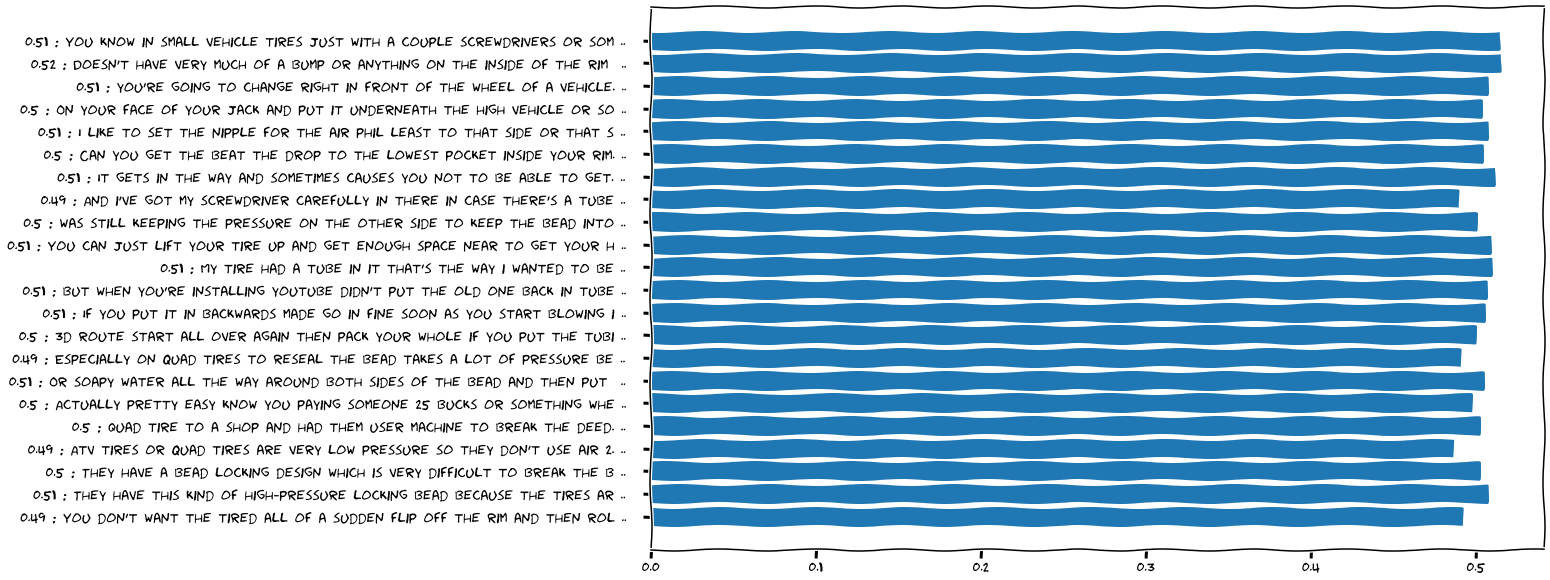

In [ ]:
sent_lenth = 70
score_vals = ([x[0] for x in scores] ) 
sub_sents = [ str(round(score_vals[i],2)) + " : " + sentences[i][:sent_lenth] + " ..  " for i in range(len(sentences))] 
with plt.xkcd():
    plt.figure(figsize=(16,10));
    plt.barh(sub_sents[::-1], score_vals[::-1])

**Model-4: Using GPT-2**


In [ ]:
!pip install bert-extractive-summarizer==0.4.2

  Created wheel for bert-extractive-summarizer: filename=bert_extractive_summarizer-0.4.2-py3-none-any.whl size=13710 sha256=c6f69c0d09bc1b122c31dd0929d7fee86a9d8cd125a30bf4c78be9533b6736e3
  Stored in directory: /root/.cache/pip/wheels/72/dc/37/8f4d3e5a337d48b296ebe21196d99dd5a52d494411b5ff9825
Successfully built bert-extractive-summarizer
  Attempting uninstall: bert-extractive-summarizer
    Found existing installation: bert-extractive-summarizer 0.5.0
    Uninstalling bert-extractive-summarizer-0.5.0:
      Successfully uninstalled bert-extractive-summarizer-0.5.0


In [ ]:
import torch
from summarizer import TransformerSummarizer
def gpt2_model(input_text):
  GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
  gpt2_sum= ''.join(GPT2_model(input_text, min_length=60))
  return gpt2_sum

https://huggingface.co/gpt2-medium/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpa5gxdzez


Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/3a7a4b7235202f93d14a4a5e8200709184c5b25a29d9cfa6b0ede5166adf0768.cf0ec4a33a38dc96108560e01338af4bd3360dd859385d451c35b41987ae73ff
creating metadata file for /root/.cache/huggingface/transformers/3a7a4b7235202f93d14a4a5e8200709184c5b25a29d9cfa6b0ede5166adf0768.cf0ec4a33a38dc96108560e01338af4bd3360dd859385d451c35b41987ae73ff
loading configuration file https://huggingface.co/gpt2-medium/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3a7a4b7235202f93d14a4a5e8200709184c5b25a29d9cfa6b0ede5166adf0768.cf0ec4a33a38dc96108560e01338af4bd3360dd859385d451c35b41987ae73ff
Model config GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
 

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/6249eef5c8c1fcfccf9f36fc2e59301b109ac4036d8ebbee9c2b7f7e47f440bd.2538e2565f9e439a3668b981faf959c8b490b36dd631f3c4cd992519b2dd36f1
creating metadata file for /root/.cache/huggingface/transformers/6249eef5c8c1fcfccf9f36fc2e59301b109ac4036d8ebbee9c2b7f7e47f440bd.2538e2565f9e439a3668b981faf959c8b490b36dd631f3c4cd992519b2dd36f1
loading weights file https://huggingface.co/gpt2-medium/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/6249eef5c8c1fcfccf9f36fc2e59301b109ac4036d8ebbee9c2b7f7e47f440bd.2538e2565f9e439a3668b981faf959c8b490b36dd631f3c4cd992519b2dd36f1
All model checkpoint weights were used when initializing GPT2Model.

All the weights of GPT2Model were initialized from the model checkpoint at gpt2-medium.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GPT2Model for predictions

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/fee58641d7a73348d842afaa337d5a7763dad32beff8d9008bb3c3c847749d6b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
creating metadata file for /root/.cache/huggingface/transformers/fee58641d7a73348d842afaa337d5a7763dad32beff8d9008bb3c3c847749d6b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
https://huggingface.co/gpt2-medium/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpvavv00_n


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/gpt2-medium/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/23c853a0fcfc12c7d72ad4e922068b6982665b673f6de30b4c5cbe5bd70a2236.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for /root/.cache/huggingface/transformers/23c853a0fcfc12c7d72ad4e922068b6982665b673f6de30b4c5cbe5bd70a2236.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/gpt2-medium/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/fee58641d7a73348d842afaa337d5a7763dad32beff8d9008bb3c3c847749d6b.c7ed1f96aac49e745788faa77ba0a26a392643a50bb388b9c04ff469e555241f
loading file https://huggingface.co/gpt2-medium/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/23c853a0fcfc12c7d72ad4e922068b6982665b673f6de30b4c5cbe5bd70a2236.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/gpt2-medium/re

You know in small vehicle tires just with a couple screwdrivers or something like that. On your face of your jack and put it underneath the high vehicle or something heavy. I like to set the nipple for the air phil least to that side or that side and start. And i've got my screwdriver carefully in there in case there's a tube and i've got to let pride up. If you put it in backwards made go in fine soon as you start blowing it up all of a sudden you suck itself in. The other methods method i showed and talked about probably won't work. They have this kind of high-pressure locking bead because the tires are low pressure and if you're doing hard cornering.


In [ ]:
gpt2_summary=[0]*(end_video)
for i in range(start_video-1,end_video):
  temp=gpt2_model(data[i])
  if len(temp)==0:
    gpt2_summary[i]=""
  else:
    gpt2_summary[i]=temp

**Model-5: Using XLNet**

In [ ]:
def xlnet_model(input_text):
  model = TransformerSummarizer(transformer_type="XLNet",transformer_model_key="xlnet-base-cased")
  xlnet_sum = ''.join(model(input_text, min_length=60))
  return xlnet_sum

https://huggingface.co/xlnet-base-cased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpwas0r_7w


Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

storing https://huggingface.co/xlnet-base-cased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/06bdb0f5882dbb833618c81c3b4c996a0c79422fa2c95ffea3827f92fc2dba6b.da982e2e596ec73828dbae86525a1870e513bd63aae5a2dc773ccc840ac5c346
creating metadata file for /root/.cache/huggingface/transformers/06bdb0f5882dbb833618c81c3b4c996a0c79422fa2c95ffea3827f92fc2dba6b.da982e2e596ec73828dbae86525a1870e513bd63aae5a2dc773ccc840ac5c346
loading configuration file https://huggingface.co/xlnet-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/06bdb0f5882dbb833618c81c3b4c996a0c79422fa2c95ffea3827f92fc2dba6b.da982e2e596ec73828dbae86525a1870e513bd63aae5a2dc773ccc840ac5c346
Model config XLNetConfig {
  "architectures": [
    "XLNetLMHeadModel"
  ],
  "attn_type": "bi",
  "bi_data": false,
  "bos_token_id": 1,
  "clamp_len": -1,
  "d_head": 64,
  "d_inner": 3072,
  "d_model": 768,
  "dropout": 0.1,
  "end_n_top": 5,
  "eos_token_id": 2,
  "ff_activ

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

storing https://huggingface.co/xlnet-base-cased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9461853998373b0b2f8ef8011a13b62a2c5f540b2c535ef3ea46ed8a062b16a9.3e214f11a50e9e03eb47535b58522fc3cc11ac67c120a9450f6276de151af987
creating metadata file for /root/.cache/huggingface/transformers/9461853998373b0b2f8ef8011a13b62a2c5f540b2c535ef3ea46ed8a062b16a9.3e214f11a50e9e03eb47535b58522fc3cc11ac67c120a9450f6276de151af987
loading weights file https://huggingface.co/xlnet-base-cased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9461853998373b0b2f8ef8011a13b62a2c5f540b2c535ef3ea46ed8a062b16a9.3e214f11a50e9e03eb47535b58522fc3cc11ac67c120a9450f6276de151af987
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architectur

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

storing https://huggingface.co/xlnet-base-cased/resolve/main/spiece.model in cache at /root/.cache/huggingface/transformers/df73bc9f8d13bf2ea4dab95624895e45a550a0f0a825e41fc25440bf367ee3c8.d93497120e3a865e2970f26abdf7bf375896f97fde8b874b70909592a6c785c9
creating metadata file for /root/.cache/huggingface/transformers/df73bc9f8d13bf2ea4dab95624895e45a550a0f0a825e41fc25440bf367ee3c8.d93497120e3a865e2970f26abdf7bf375896f97fde8b874b70909592a6c785c9
loading file https://huggingface.co/xlnet-base-cased/resolve/main/spiece.model from cache at /root/.cache/huggingface/transformers/df73bc9f8d13bf2ea4dab95624895e45a550a0f0a825e41fc25440bf367ee3c8.d93497120e3a865e2970f26abdf7bf375896f97fde8b874b70909592a6c785c9
loading file https://huggingface.co/xlnet-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/xlnet-base-cased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/xlnet-base-cased/resolve/main/tokenizer_co

You know in small vehicle tires just with a couple screwdrivers or something like that. She was a stupid to try to beat it with a big hammer yellow usually end up wrecking your rim. On your face of your jack and put it underneath the high vehicle or something heavy. And i've got my screwdriver carefully in there in case there's a tube and i've got to let pride up. 3d route start all over again then pack your whole if you put the tubing upside down so that sucks. Especially on quad tires to reseal the bead takes a lot of pressure because it's at high pressure locking be because it's a low pressure tire. You don't want the tired all of a sudden flip off the rim and then roll your machine.


In [ ]:
xlnet_summary=[0]*(end_video)
for i in range(start_video-1,end_video):
  temp=xlnet_model(data[i])
  if len(temp)==0:
    xlnet_summary[i]=""
  else:
    xlnet_summary[i]=temp

**Model Evaluations**

In [ ]:
reference = [
"",
"Dogs and cats naturally wear down their nails while walking running or scratching trees however some animals don't and this can be a problem cutting the nails can be a difficult problem for both of you.",
"",
"",
"",
"",
"You coming tonight to call the breakdown service. Honest toyota the air compressor for inflating the tires. So take the lead from the compressor and plug it into the cigarette lighter or 12 volt socket inside your car. If the tire isn't inflating pro play troy rolling the car forward a few meters to help the seeding spread around if that doesn't work you may still need to cool the breakdown service.Take the links to find out best boy toys readout going to saving money on tires and find out which breakdown companies we recommend.",
"There's a slogan is charging an electric car is charging the energy of the earth. This means that you get to play a role in reducing greenhouse gas emissions by driving eco-friendly vehicles. The minister of environment seoul metropolitan government in korea and government corporation is established infrastructure for electric cars. Electric cars and infant explain quality improvement. The 2012 electric vehicle and smart curry salvation was held in october 17th to display eco-friendly electric vehicles and related equipment. Can you tell a funny pictures of electric vehicles related industries including two wheeled vehicle of material charging system dissipated into this is a business fair that is a deficit exchanges between perfect.",
'''You know in small vehicle tires just with a couple screwdrivers or something like that. First of all there's three kinds of bead styles the first feed style is the tube style tire. Lock the rubber beaded attire. Put the rubber part of the tire. On your face of your jack and put it underneath the high vehicle or something heavy. I like to set the nipple for the air phil least to that side or that side and start. I start to unpeel it was still keeping the pressure on the other side to keep the bead into the deep groove. Pinche rim a little bit with a vice grip right there. If you have a tube type tire. My tire had a tube in it that's the way i wanted to be but when you're installing youtube didn't put the old one back in tubes very often head of have a right or left side. So that means a nipple ism moroch center. We can't get ahold of nipple anymore.
Cut the valve stem over there a vice grip opposite to it now i'm going to stand as best as i can hear sometimes it takes two people get that lip into the deep groove. Especially on quad tires to reseal the bead takes a lot of pressure because it's at high pressure locking be because it's a low pressure tire. Quad tire to a shop and had them user machine to break the deed. Atv tires or quad tires are very low pressure so they don't use air 2.
They have this kind of high-pressure locking bead because the tires are low pressure and if you're doing hard cornering.''',
"I like really hit the gym really thorough that night. About about 7 years ago and since then we've other people will start to join us with your grass so i was with larenz made out of people. Parkour is a discipline of training your mind and body to overcome obstacles and i'll be trained s5 running jumping climbing vaulting balancing things like that you want to try a new job for you not just you know just physically job at the same time. Space. Rolls or something that can save your life or your knee i tore two muscles in my neeks i fell off a building and i didn't roll my leg buckled to the side but had i actually rolled i would've been okay. Poor decisions so. And if you ever seen people do the dive rolls that's going to be teaching you too so we'll start with rolls on the ground fall rolls and then dive world. So coming through. I'll just go here. How many people. My compaq.",
"I totally jacked up his bum. I think i feel a little bit better or i'm just on so many. Jugs. It doesn't hurt. Bentley a bath and a trim cuz i don't like the way that he came out. Going to the groomer. Last week i feel like she doesn't deserve him. And i liked it so imma do this. Myself. Give him a bath bomb out i ordered the wahl bravura clipper set and not should be delivered any minute now by fedex. But figured i would just wash. I'm plum out you know he's already kind of clean. But everything i read about using clippers and clipping dogs. Mohanty. And i. Think i kind of desensitized him to the hair dryer. In his face. Cuz i just rapid fired kimball at him. When i was using the blow dryer in the parts that he didn't like cuz i read in a job training book. How to desensitize a man i think it worked a little bit i was able to actually blow out his head and it's not all wavy. I mean i could have blown out better but you know what i think i actually did a pretty good job even though your face is a little dirty. So now i'm just going to let him play. And we're waiting for our clippers to be delivered you not going to go to the groomer while your mama's going to do it. It's really not that bad probably need a little more. Tear. Say i look good mama you did good job. Oh my god i like totally jacked up his butthole. And i'm just going to i don't even know what i did i just kind of went along with maltese obsession. With what she didn't her video has a couple spots that aren't perfect. But it's my first time it's okay and also he just got blown out so when his hair grows back. And his natural oils come back it'll blend a lot better. You my little puppy for everything a do you want to do i want his legs a little smaller. And i kind of don't make fun of me like his but i did way too much. Show me your butt. I did too much on your but i'm still having my bubbies.",
"",
"A hydrocodone. Broccoli. Ncg. Is a fascist. Am i. Gorgeous. You don't have to pay in d.c. peanuts. Una cancion. Music opera. La liga. Plow on at the cinema. Aaa. Mclaren. If so, don't even with you. L'appel du vide downfall squally mobile. Gwtw steal a security officer during a table. Indonesian police hawaii.",
"Hangout.com. Optimus. Dr. jacarilla according to the admiralty personality moves and all the stuff. I needed that this one sees the lady she's a lady. What's this all about.",
"As extension educators we get frequent phone calls concerning paper wasps and their nests. And as a homegardner you'll probably run into these things at one point in time now. This is a little bit of a problem because paper wasps are actually a beneficial insects are out collecting. And. Usually they're found in the eaves of homes and structures. And they can be knocked down with a shovel or other implements. And then taken away and thrown away. It's a good idea to go ahead and remove it whenever you possibly can. And that can be done chemically. Their products available that are specific to wasp and hornet control. And wait until evening. Spray that product so that all the wasps are on the nest.",
"What's the number one question people ask about six gear bikes. How do you stop. How to stop on a fixed gear bike is the most frequently asked question from mom's pedestrians or other people who can't believe you're riding a bike with no brakes. Are lots of techniques to stop a fixed gear bike. The one we recommend is by using your friend break if you're going to be a real g and you got rid of the front brake here's some tips that will help you slow your roll. First. The skip stop. This is a technique where you skip on your rear wheel gradually slowing you down. When you land the bike skips and reduces speed. Refugee together and you just save yourself from crashing and that parked car. Hey what's up cuz i'm new york and if you're wondering how to do a skip stop i got your answer. First of all you want to get up to speed. You don't want to rise out of your saddle way to take weight off the back wheel. Then using your feet you're literally going to pick up the back wheel which are basically stopping in midair. Also keep in mind whatever foot is forward if you actually what you put up with and whatever for his back is the one you put you down with. Basically those are the steps to do a skip stop. Skip. is where you lock up your rear wheel causing your bike to skid and slow down. This is a fast way to stop but it also eats up your rear tire. In order to skid you need to be going somewhat fast. Rose on your side of take weight off the back wheel. Pull up with your left pedal by pushing down the right pedal keeping in mind leah pedal should be horizontal. If you need extra leverage you can always push your leg against the top two with a frame and that's pretty much how you doing skin. The easiest way to slow down is to apply back pressure to your pedal. It really looks like nothing but pull back on the pedal that they rotate and you'll slowly cruise to a stop. When ready fixed gear it is very important to have some kind of a retention on your pedals. You can either use straps or clips either way you need some kind of flirtation to perform any of the stops we feeling today. Do you have any questions or comments we want to hear from you. So hit us up on our twitter at pure fix tv. Or drop at the comment right down below. Do the next week for a new episode on pureflix tv.com. Tell next time i'll see you in the street.", 
"Do you want some cat food. Play some other kind of food we got some dog food. Can cats eat dog food didn't actually eat dog food. You say what do you say yes or no yes or you think silly dog food yes.Y'all trying some dog food. Why does dog food. Can you eat that dog food. No they're watching this at our cat is really picky there's a lot of cat food that she won't eat.This is kind of strange to see her eating dog food but she really likes this dog food so i might have to buy this again. We just fed our cat and dog food. The dog food. Dog food.Will mickey survive the night she ate dog food and didn't get sick. You can see that you really liked your dog food. So yes cat can eat dog food yay.",
"",
"",
"",
"Initial film i'm going to explain how to repair a tire using the compressor and sealing kit provided instead of vehicles. Having a kid in your vehicle increases space and reduces weight. Play the parking brake to prevent the vehicle moving accidentally. Make some old passengers leave the vehicle and move to a safe area.The kick cannot be use of the wheel room is damaged or the vehicle has been tripping with an under-inflated or flat tire for an extended. If you don't use the punch repair kit. You will need to arrange vehicle recovery by contacting skoda roadside assistance. The kit comprises of a compressor unit and the sealing kit.Valve to spare tire valve and warning sticker in the back. Now we remove the valve cap from toy valve itself. Puppet into the valve. Now we get the fluid and attach the philips hue to the time about.I just met a where the time valve is located when the vehicle is stationary. As a suitable work its way around the tire for the vehicle is driven. Disconnect the philips hue from the tiebout and refit the valve insert. Now we take the compressor. So please see your local skoda retailer or tire retailer immediately who can repair or replace the damaged tire. Please do not hesitate to contact your local skoda retailer.",
"I'm jeff 92 malin welcome to my kitchen today we are making something super delicious is always we're making a reuben sandwich with what. Sauerkraut you can see the recipe on one of my bootleg tip videos we have some homemade pickles again another wonderful bootleg tip video you can catch swiss cheese rye bread we're making a very quick easy russian dressing and you wonder why i have a side of. Rye bread that you can use any type of bread you want you don't have to use where i read even have to use dark rye bread really quick cuz i can do it that way get on your play next going to start building i like that so the fat stays on player one.",
"A truck at 12 asleep deliver something is watches that. And the truck. The truck ran off the road nearly tipped over went down the galley. Should the truck.Cuz there's a truck coming that's going to try to pull us out. We got another big truck. To pull the truck that markets. In the rat.Moxtek truck the back truck. Glozell raincloud said that gabe's there's a listing for soul as you can see the gun to employ the palfinger indominus sounding names piece of machinery responsible without whom the situation with niva and happens not stuck truck. Rescue truck. Finger pal and mock stuck truck peel-off bowling branch.",
"Master grooming little bedding for them to make sure they're comfortable and so they tend to lay down and rather than sit up waiting. Their tables a lot of places have tables that don't lower. So here if you want to demonstrate rosie. We just take a moment to. In a comfort calm him down a little time spent cards and grooming. Easier. Camino them well we know their habits. You know simon things like that grain-free gluten-free you know. Serious issues for dogs i mean a lot of commercial foods have. Fillers that food they can't process their body can't process i need to come hill.",
"The granddaddy of bikes. Either you can do it or you. Today we're going to teach you. How to wheelie. Hey guys. Doing a wheelie something with all designer do since our very first bike ride. Go ahead and do it man. First you comfortable pulling your front wheel up. Then push with your lead foot and lean back. Practice is running around empty parking lot. But don't use a strap just in case you have to bail. Wright ford and pull the front wheel up. Once you push off your leave foot lean back and find your balance point. Once you're locked in remember the combination of shipping your body weight. And the speed that you are pedaling.",
"Cadillac cts. Your car's not worth a lot to look at it. Got any battery. He complained. How about your flat tire you could definitely say that. Maybe you could. Wonder what happened. Are waiting for becca to get here with her jack from her car. My muscle man. We've been having fun taking video. What's happiness. Show us happy face. Have you ever done this before they feel manly. I'm going to eat another piece of chocolate. Well they're figuring out what to do. Bad boy allergies. I can't help song. Ladies take note. Change a tire.. I feel about steinbach your head. I was in a bad jumper back tonight. Now the key to being successful in life it's always have a stent. The best that's a spider. Now it did. It's asking your dad to see if i'm if i did it right.",
"One dog getting a new leash on life at his heaviest ob a five-year-old dachshund weight a whopping 77 lb that or foster parent he's going on a strict diet. When you heard about a 77-pound dachshund. We are just putting them on a high-protein high-fiber low-energy diet and he's able to eat we have to meet we're feeding about 2 cups a day. Yeah i find it to the treats and it's benji it just like people to binge-eating relation between overweight pet owners and overweight pets.I don't know if there's going to study done to look at that butt in my clinical practice yes i see a lot of dogs were overweight a new owners tend to be overweight as well.",
"Okay so you finally invested in a bike and now you need to know how to keep it safe and we're going to show you how. Is getting rid of any quick release lever. Quick release levers on your wheels and seatpost make removing them easy. It only takes a few seconds to remove a quick-release front wheel or saddle you should replace any quick release levers with allen bolt or 15 mm nuts.A bike that looks fresh and clean the tracks would be c. Your bike won't ride me different but i'll be much less attractive. Don't ever leave your bike unlocked. It's not a lock your bike using you lock.Alright thank you so much that you guys got to remember to get the right lock & lock up your bike if you have any comments please comment below or hit us up on our twitter.",
"",
"",
"I get very irritated with food that when you bite into it, it Burns your mouth. I think the toppings make it unique. I think just the way the chicken itself plays with the honey, the sweetness and that, the spiciness and the Tabasco, the crunch of the cucumber and the radish in it, I think it's a unique sandwich. My philosophy on food, I think ultimately, no matter what, it boils down to one common principle, which is the intention is to create a product that we're proud of that makes the person eating it smile.This is a damn good sandwich. We wanted to do what we call an American Bistro here because we're in America. I'm American. Part of my family is American.And then within that offer a few inflictions of French food that we love we are trying really hard to make connections with our guests.",
"",
"",
"",
"Basically whipping the bike is. Basically with the bike out sideways so that the goal would be to get the bike either you know parallel to the ground. Just kind of chicken the bike out. Some people get confused as to what actually goes on in the web and how you get the bike back but when you do the whip correctly the bike and the momentum of your bike will actually bring you back around and straighten you out before you hit the ground.Above your ability level. Which will bring the bike. Your bike back up straight. Straight.Bike all the way back. The weapons basically just star. I'll bring the bike around. You got the bike out.The key is just to stay within your ability level. Use your your body and your bike. And let the momentum carry the cross. The weapons by far the most impressive looking tracking.Let the bike fall out there in the momentum. Like i said the weapons a lot of fun.",
"Melissa laurel sheen parade it's a great part of mount holyoke tradition where we carry the screen laurel and feels like. Side-by-side we look forward to doing this this every year and we we plan. Months in advance to make sure that we have all the roping. Signs the signs are always creative. They're always appropriate to the era in which we went to college and it's great fun to see the seniors 13 is our granddaughter class. The seniors and. Adopting. Granddaughters. It's part of the tradition it really doesn't matter. Whether they are the class of.",
"We are inside an outbuilding on a farm here in bisbee where this massive killer bee hive was located. Big enough we're told to hold more than 250,000 killer bee. It is the attack of the killer bees sound like a horror flick this is very real and animal farm located off highway 80 in bisbee freelance videographer alice ignore a shot this unbelievable footage 1000-lb bore under attack. Don't like i've been boxing without gloves but everyone else runs this guy comes buzzing in reboot called himself the killer bee guy.",
"New details tonight about a train accident we first told you during our four newscast take a look for my cvs atlanta sky i. You can see the accident. Steve is this accident an isolated event. You know stephanie it's really not and the driver of that vehicle is thankfully able to get out of her car with plenty of time to spare before that train came along another problem maybe the way that the asphalt was late is about a 6 inch drop between the surface.And the railroad ties and neighbors hearsay cars. Locomotive push the vehicle 1000 feet before finally stopping. All too often we've been having truckers get stuck out here vehicle getting stuck on the tracks i'll help maybe 45 people get off the track. Apart from several collisions in the past year there have been 22 documented incidents of cars.",
"",
"Okay let's tell him to tell us what happened. Okay well. Second i'm driving and. Driving down the pass through following the dog. Yeah. Emma's car kinda got stuck in the snow were you two young lovers doing in the back forty acres anyways all alone. Driving to run out of gas. I think you're stuck for good. Liquid ammonia merryweather. Well that's pretty bad. There's no use taking this one out. We'll have to leave and help the indians don't destroy it. Everybody know we can't get it out. The snow is on the frame. We need 50 more kids like you and we might have hoped but. Great great wolf. Waffle show us the way. Garage rock. Gunners mouse and i think it's better. The front window.",
"",
"Fresh avocado we had some chipotle pepper some jalapeno loopsy jalapeno peppers queso blanco you can use oaxaca cheese or any type of penalties that you wanted it can't find that use mozzarella we have finley sliced chicken breast. And a couple of eggs all right let's get cooking going to do a little prep in the morning to get the food over the stove first thing first going to get my tomatoes cut i like to use roma tomato just because i like roma tomatoes tomatoes you can use any type of tomatoes or tomato is a tomato. Just enough for the sandwich plate. Cheese.Some cheese from mexico that don't melt. You find one that you like and use it and avocado i don't like my avocado too mushy i like it just right. Next yes you got it we are going to bread or chicken okay this is an easy process first what i do is i get my eggs in a bowl with it a little bit and then we're going to dip or chicken into the eggs and then into the breading and that's it. As always get extra fat into my meals going to do that i'm going to butter my bread and make it nice and super crispy.Oil claim is nice. Indian goes my bread meanwhile. Get some beans into the pan then just do a nice little heat smash so i have some how you say lately fried beans i think about one more minute for my chicken and it's ready to come out you can do disdain recipe with steak like a new aneja you could do with fish if you wanted to or you can do it and make the same book a sandwich that's right you can't give it a little more smashy smash. Okay we are now going to do something that takes a lot of concentration extremely serious we're going to build a torta they have are black beans already at the bottom layer that's right we had some cheese.I'm going to do some tomatoes. Are you go tomatoes. You could cut it up into little slick little time time time time time time time flavors but why i was going to make this sandwich the chicken charger we are going to add pickled jalapenos. It's going to lay it across okay i got my lettuce on i got my jalapeno peppers.Avocado going on there.",
"Play the undertaker bees guard bees nursery bees. Are we go over here and open up a hi-c with the bees are doing now you going to get in trouble those fees by open up that high. Is it working on a honey super now. Well i produce 3/4 lb of honey low and how long does it take for them to do that that depends on the honey flow and how many bees you got in the hive how much honey you're going to get so if you got a full two boxes of honey bees in the bottom why you can in a good honey flow fill one of these is there any way of knowing that approximately 60,000 and august they build up during the summer.We sometimes have fireweed honey or boo boo berry honey or the blackberry. Honey from a local beekeeper if you have allergies.",
"",
"",
"We're taking smartphone a spaceship technology on a motorcycle platform with the safety of a car. They see it there is a robot motorcycle. Itself oz and i really creases like you know your safety and your range. And excitement of riding a motorcycle. Jordan miles for charge to two-wheel drive. Wheel hub motor electric vehicle. Stare like a car. You said it like a car pedals like a car but. You know the robot side it takes your steering input. And eileen he returns a lot like a jet fighter. So it's you can see full like tronics in here. And this is actually a real jar all right here so take a look at this the gyroscopes inside. Basically output around 1300 ft lb of torque. So you basically the baby elephants knock it over it's a lot like a cmg or control momotaro. The international space station and most satellites use the same fry orientation technology we've just kind of taking that and you don't need a commercially available their servos and there a gyro motors there traction motors on but sensors like an imu ir sensors. There is actually a temperature and heat sensors. Myriad of santa was actually all feed data that has to be processed. And through that process commando to the gyros to tilton lean. On the vehicle to keep it balanced or either to lean into a turn. All i know it's the very dependent lee base on our processing system. The project that we have now uses to i7s at our end product we should be using something that could power a small ramon today. What hurdles in our development is having the vehicle actually be more aware of its surroundings do it but also having good sensory perception. I'm of the road of any kind of external influences or disturbances. And having that all get computer to processed till out for stability. All scenarios. On the heads-up display you see battery life range. How much left do you have in your possession budget. You kind of get your artificial horizon. And also you know being expensive rolling smartphone so all the information on your smartphone will be on a side panel upgrading the hardware can be done pretty easily. Vdara taxi, in the battery pack coming until tomorrow storage unit. So you can upgrade the gyro output you can upgrade the battery size you know or or both. So if you want a faster a more robust or stabilized you know c1 it's pretty easy to upgrade that the chassis made out of steel we could be using us some kind of composite body. For the interior swell neil parts count where 1/10 of a part of a car. Hi car seat typically have run 24000 parts if you drive an audi at 40,000. William 2239. So it's freezing main factor that's why we can make it affordable. In our audience urban professionals tech junkies you know they have to have the first thing. They can mute their professional life they still want to have fun and young. They want to have first best thing but at affordable price.",
"The dogs develop dirt and debris and discharging their ears it has to be taken out and so will you solutions like the ear cleansing solution to help break up debris and dirt to help change the ph of the ears to help make it where it's not a hospitable environment for the bugs. One thing to remember is that if you're treating and cleaning ears the same time need to clean the ears 30 minutes prior to treatment. Couple tips on cleaning ears first of all you want to grip the ear at the base of the year but not so much that were causing pain.",
"I'm sure you've learned your gmc really lives up to its never-say-never reputation. One that will continue for a long time. Get there comes a time when the tires are gmcs came with need to be replaced. Gmc recommends rotating your tires every time you change your oil or 7,500 miles. Your certified service experts will use a tread depth measurement tool like this to see if your tires need replacing. Cuz of course riding on bald tires is definitely a safety hazard. You also need proper tire balanced and unbalanced or improperly balance tire and wheel and make your car vibrate as well as kraton even tread wear. Bent wheels were misaligned suspension can also produce uneven tread wear and cause tires to lose air so watch out for those sneaky potholes and curves.",
"Everybody what's going on it's josh beats here in this is the first episode of poor man's meals so let's go ahead and get right into it. Not turd ferguson. Hey turd ferguson. Yeah we won.What should we do i've got some hot links i've got some ketchup on got some onions what do you think. Obviously myself is being stubborn or turd ferguson. So bottom line is this we're going to be making some spicy sausage sandwiches. Onion.Peel that onion. Cutting onions. Play kid off onions are layers. Layers of onion.Spicy sausage. Spicy hot links. We're going to cook this for about 45 minutes what's that going to do to catch up. Oh yeah kitchen.Extra 45 minutes right here on the stove. I hope you enjoyed join me next time for another episode of poor man's meals until then.",
""
]

**BLEU Method**

In [1]:
from nltk.translate.bleu_score import sentence_bleu
def BLEU_score(input_text,model_name,video_no):
    bleu_1={}
    bleu_2={}
    bleu_3={}
    bleu_4={}
    bleu_4_cummulative={}
    bleu_1[model_name]=str(video_no+1)+':'+str(sentence_bleu(reference[video_no], input_text, weights=(1, 0, 0, 0)))
    bleu_2[model_name]=str(video_no+1)+':'+str(sentence_bleu(reference[video_no], input_text, weights=(0, 1, 0, 0)))
    bleu_3[model_name]=str(video_no+1)+':'+str(sentence_bleu(reference[video_no], input_text, weights=(0, 0, 1, 0)))
    bleu_4[model_name]=str(video_no+1)+':'+str(sentence_bleu(reference[video_no], input_text, weights=(0, 0, 0, 1)))
    bleu_4_cummulative[model_name]=str(video_no+1)+':'+str(sentence_bleu(reference[video_no], input_text, weights=(0.25, 0.25, 0.25, 0.25)))  

50


In [ ]:
model=input("Enter one of the following only: 1.) tfidf, 2.) spacy, 3.) bert, 4.) gpt2, 5.) xlnet")
for i in range(start_video-1,end_video):
  if model=="tfidf":
    BLEU_score(tfidf_summary[i],model,i)
  elif model=="spacy":
    BLEU_score(spacy_summary[i],model,i)
  elif model=="bert":
    BLEU_score(bert_summary[i],model,i)
  elif model=="gpt2":
    BLEU_score(gpt2_summary[i],model,i)
  elif model=="xlnet":
    BLEU_score(xlnet_summary[i],model,i)
  else:
    print("Error: Model not found")

**ROUGE Method**

In [ ]:
!pip install git+https://github.com/tagucci/pythonrouge.git

In [ ]:
from pythonrouge.pythonrouge import Pythonrouge
def ROUGE_score(input_text,model_name,video_no):
    rouge = Pythonrouge(summary_file_exist=False,
                    summary=input_text, reference=reference[video_no],
                    n_gram=2, ROUGE_SU4=True, ROUGE_L=True,ROUGE_W=True,ROUGE_W_Weight=1.2,
                    recall_only=False, stemming=True, stopwords=False,
                    word_level=True, length_limit=True, length=50,
                    use_cf=False, cf=95, scoring_formula='average',
                    resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print("Rouge scores for the model:"+model_name+"for the video:"+str(video_no+1))
    print(score)

In [ ]:
model=input("Enter one of the following only: 1.) tfidf, 2.) spacy, 3.) bert, 4.) gpt2, 5.) xlnet")
for i in range(start_video-1,end_video):
  if model=="tfidf":
    ROUGE_score(tfidf_summary[i],model,i)
  elif model=="spacy":
    ROUGE_score(spacy_summary[i],model,i)
  elif model=="bert":
    ROUGE_score(bert_summary[i],model,i)
  elif model=="gpt2":
    ROUGE_score(gpt2_summary[i],model,i)
  elif model=="xlnet":
    ROUGE_score(xlnet_summary[i],model,i)
  else:
    print("Error: Model not found")

**BERT Score Method**

In [ ]:
!pip install torch==1.5.1
!pip install transformers==3.0.1
!pip install bert_score==0.3.4

In [ ]:
from bert_score import score
from bert_score import plot_example
def BERT_score(input_text,model_name,video_no):
    P, R, F1 = score(input_text, reference[video_no], lang="en", verbose=True)
    print("Bert score for the model:"+model_name+"for the video:"+str(video_no+1))
    print(f"F1 score: {F1.mean():.3f}")
    
    plot=int(input("0: plot not required, 1: plot required"))
    if plot:
        plot_example(input_text, reference[video_no], lang="en")
    else:
        print("plot not specified by user")

In [ ]:
model=input("Enter one of the following only: 1.) tfidf, 2.) spacy, 3.) bert, 4.) gpt2, 5.) xlnet")
for i in range(start_video-1,end_video):
  if model=="tfidf":
    BERT_score(tfidf_summary[i],model,i)
  elif model=="spacy":
    BERT_score(spacy_summary[i],model,i)
  elif model=="bert":
    BERT_score(bert_summary[i],model,i)
  elif model=="gpt2":
    BERT_score(gpt2_summary[i],model,i)
  elif model=="xlnet":
    BERT_score(xlnet_summary[i],model,i)
  else:
    print("Error: Model not found")